In [1]:
'''
Revenue codes- In short, Revenue Codes are descriptions and dollar amounts charged for hospital services provided to 
a patient. The revenue code tells an insurance company whether the procedure was performed in the emergency room, 
operating room or another department.

rev_cms_ambul_ind	 Binary indicator for each of Revenue code CMS categories present in the reference table	Others
rev_cms_clinic_ind	 Binary indicator for each of Revenue code CMS categories present in the reference table	Others
rev_cms_er_ind	 Binary indicator for each of Revenue code CMS categories present in the reference table	Others
rev_cms_icu_ind	 Binary indicator for each of Revenue code CMS categories present in the reference table	Others
rev_cms_lab_ind	 Binary indicator for each of Revenue code CMS categories present in the reference table	Others
rev_cms_nicu_ind	 Binary indicator for each of Revenue code CMS categories present in the reference table	Others
rev_cms_phar_ind	 Binary indicator for each of Revenue code CMS categories present in the reference table	Others
'''

'\nRevenue codes- In short, Revenue Codes are descriptions and dollar amounts charged for hospital services provided to \na patient. The revenue code tells an insurance company whether the procedure was performed in the emergency room, \noperating room or another department.\n\nrev_cms_ambul_ind\t Binary indicator for each of Revenue code CMS categories present in the reference table\tOthers\nrev_cms_clinic_ind\t Binary indicator for each of Revenue code CMS categories present in the reference table\tOthers\nrev_cms_er_ind\t Binary indicator for each of Revenue code CMS categories present in the reference table\tOthers\nrev_cms_icu_ind\t Binary indicator for each of Revenue code CMS categories present in the reference table\tOthers\nrev_cms_lab_ind\t Binary indicator for each of Revenue code CMS categories present in the reference table\tOthers\nrev_cms_nicu_ind\t Binary indicator for each of Revenue code CMS categories present in the reference table\tOthers\nrev_cms_phar_ind\t Binary 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
'''
Addictive Disorder Treatment Program (ADTP)
aoth-?
bipr-bipolar disorder
cd- Conduct disorder?
dema- demantia
bh_adtp_ind	 Binary indicator for each of the BH Categories	Not sure
bh_aoth_ind	 Binary indicator for each of the BH Categories	Not sure
bh_bipr_ind	 Binary indicator for each of the BH Categories - bipolar disorder+C10	Not sure
bh_cdal_ind	 Binary indicator for each of the BH Categories	Not sure
bh_cdsb_ind	 Binary indicator for each of the BH Categories	Not sure
bh_cdto_ind	 Binary indicator for each of the BH Categories	Not sure
bh_dema_ind	 Binary indicator for each of the BH Categories - dementia	Not sure
mabh_seg	Medicare Segmentation	Not sure
'''

'\nAddictive Disorder Treatment Program (ADTP)\naoth-?\nbipr-bipolar disorder\ncd- Conduct disorder?\ndema- demantia\nbh_adtp_ind\t Binary indicator for each of the BH Categories\tNot sure\nbh_aoth_ind\t Binary indicator for each of the BH Categories\tNot sure\nbh_bipr_ind\t Binary indicator for each of the BH Categories - bipolar disorder+C10\tNot sure\nbh_cdal_ind\t Binary indicator for each of the BH Categories\tNot sure\nbh_cdsb_ind\t Binary indicator for each of the BH Categories\tNot sure\nbh_cdto_ind\t Binary indicator for each of the BH Categories\tNot sure\nbh_dema_ind\t Binary indicator for each of the BH Categories - dementia\tNot sure\nmabh_seg\tMedicare Segmentation\tNot sure\n'

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("2020_Competition_Training (1).csv")
# df= pd.read_csv('2020_Competition_Holdout .csv')
# df['transportation_issues'] =0

/root/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (80,193) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
def data_viz(df_visualize):
    df_visualize = df_visualize.groupby(['transportation_issues']).sum().transpose()
    df_visualize.reset_index(drop=False,inplace=True)
    df_visualize.columns = ['sum_columns','no_issues','issues']

    df_visualize = df_visualize.melt(['sum_columns'])
    
    df_visualize['avg_value'] = 0

    for index, row in df_visualize.iterrows():
        if row['variable'] == 'no_issues':
            df_visualize.loc[index,'avg_value'] = row['value']/59375
        else:
            df_visualize.loc[index,'avg_value'] = row['value']/10197
    
    return df_visualize

In [6]:
def logistic(X_train, X_test,y_train, y_test):
    logistic_regression= LogisticRegression()
    logistic_regression.fit(X_train,y_train)
    y_pred_test=logistic_regression.predict(X_test)
    y_pred_train=logistic_regression.predict(X_train)
    return logistic_regression,y_pred_train, y_pred_test
    

In [7]:
def metrics_fn(model, y_train, y_test, y_pred_train, y_pred_test):
    from sklearn.metrics import confusion_matrix,accuracy_score
    from cf_matrix import make_confusion_matrix
    import sklearn.metrics as metrics
    import matplotlib.pyplot as plt
    print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
    print('Accuracy: ',metrics.accuracy_score(y_train, y_pred_train))
    
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4) # for label size
    make_confusion_matrix(cm, group_names=['no- issue','issue'],categories=['no-issue','issue'], cmap='binary')
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) 
    plt.show()
    
    
    

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    # preds = [1]*17119
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [8]:
def xgboost_fn(X_train, X_test, y_train, y_test):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    # Hyperparameter tuning grid
    params = {'min_child_weight': [5],
            'gamma': [1.5],
            'subsample': [0.8],
            'colsample_bytree': [0.8],
            'max_depth': [4]}

    from sklearn.model_selection import GridSearchCV
    from xgboost.sklearn import XGBClassifier
    # Initialize XGBoost model, use growth tree algorithm similar to lightgbm
    bst = XGBClassifier(n_jobs=-1,grow_policy='lossguide',tree_method ='hist',n_estimators=150)
    # Gridsearch on parameter grid, use AUC to determine the best model
    cv = GridSearchCV(bst,params,'roc_auc',-1, verbose=10)
    # Fit model on the training data, track logloss on training and testing set
    cv.fit(X_train, y_train,eval_metric='logloss',eval_set=[(X_train,y_train),(X_test,y_test)],verbose=False)

    import cf_matrix
    from cf_matrix import make_confusion_matrix
    from sklearn.metrics import confusion_matrix,accuracy_score

    y_xg_pred_test = cv.best_estimator_.predict(X_test)
    y_xg_pred_train = cv.best_estimator_.predict(X_train)

    print(metrics.accuracy_score(y_test, y_xg_pred_test))
    print(metrics.accuracy_score(y_train, y_xg_pred_train))


    cm = confusion_matrix(y_test, y_xg_pred_test)
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4) # for label size
    make_confusion_matrix(cm, group_names=['no- issue','issue'],categories=['no-issue','issue'], cmap='binary')
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) 
    plt.show()

    import joblib

    # Print out the best parameters
    cv.best_params_

    #save model
    joblib.dump(cv.best_estimator_, 'xgb.model')


    #load saved model
    xgb = joblib.load('xgb.model')


    import sklearn.metrics as metrics
    # calculate the fpr and tpr for all thresholds of the classification
    probs = xgb.predict_proba(X_test)
    preds = probs[:,1]
    # preds = [1]*17119
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


    # retrieve performance metrics
    results = xgb.evals_result()
    epochs = len(results['validation_0']['logloss'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss');

    # Feature importance plot
    feature_importance = pd.DataFrame({'feature':xgb.get_booster().feature_names, 'importance':xgb.feature_importances_}).sort_values('importance',ascending=False).reset_index().drop(columns='index')
    fig, ax = plt.subplots()
    fig.set_size_inches(8.27,15)
    plt.title('Feature Importance Plot')
    sns.barplot(x='importance',y='feature',ax=ax,data=feature_importance[:50])
    
    return feature_importance
    


In [9]:
def train_test_split_fn(df):
    y = df['transportation_issues']
    X = df.drop(['transportation_issues','person_id_syn'],axis=1)

    
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    import seaborn as sn
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import StandardScaler

    # y = Demographic_Df['transportation_issues']
    # X = Demographic_Df[['est_age']]

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

    X_train.reset_index(inplace=True,drop=True)
    X_test.reset_index(inplace=True,drop=True)
    y_train.reset_index(inplace=True,drop=True)
    y_test.reset_index(inplace=True,drop=True)
    
    return X_train, X_test, y_train, y_test

In [10]:
def plot_categorical(i,df):
    fig,ax = plt.subplots()
    fig.set_size_inches(18,7)

    ax = sns.countplot(x=i, hue="transportation_issues", data=df)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 1.9, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.show()
    

In [11]:
def numerical_plotting(i,df):
    fig,ax = plt.subplots()
    fig.set_size_inches(18,7)
    df.groupby([i, 'transportation_issues']).size().unstack().plot(kind='bar', stacked=False,rot=90,ax=ax)
    plt.show()

In [12]:
def label_encoder_fn(df, categorical_columns, numerical_columns):
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    from collections import defaultdict
    d = defaultdict(LabelEncoder)
    from collections import defaultdict
    d = defaultdict(LabelEncoder)
    df_cat = df[categorical_columns].apply(lambda x: d[x.name].fit_transform(x))
    df_num = df[numerical_columns]
    df_all = pd.concat([df_num,df_cat],axis=1)
    
    return df_all

## Revenue

In [13]:
#revenue codes
rev_df= df.filter(items=['person_id_syn',
'transportation_issues',
'rev_cms_ambul_ind',
'rev_cms_clinic_ind',
'rev_cms_er_ind',
'rev_cms_icu_ind',
'rev_cms_lab_ind',
'rev_cms_nicu_ind',
'rev_cms_phar_ind'
])

for i in rev_df.drop('person_id_syn',axis=1).columns:
#     print(i)
    rev_df[i] = rev_df[i].astype('category')
    df_one = rev_df[rev_df[i]==1]
    print("percentage of ",i, 'as Yes is', df_one.shape[0]/rev_df.shape[0])
    print("percentage of YES and Transportation Issue", df_one[df_one.transportation_issues ==1].shape[0]/rev_df.shape[0])
    print('-'*30)
    
rev_ind_columns  = [s for s in rev_df.columns if 'ind' in s]
rev_df['rev_sum_ind'] = rev_df[rev_ind_columns].sum(axis=1)
rev_df.loc[rev_df.rev_sum_ind > 0, 'rev_yes_no'] =1
rev_df['rev_yes_no'] = rev_df.rev_yes_no.fillna(0)
rev_df['rev_yes_no'] = rev_df['rev_yes_no'].astype('category')

percentage of  transportation_issues as Yes is 0.1465675846604956
percentage of YES and Transportation Issue 0.1465675846604956
------------------------------
percentage of  rev_cms_ambul_ind as Yes is 0.0012505030759500948
percentage of YES and Transportation Issue 0.0003593399643534755
------------------------------
percentage of  rev_cms_clinic_ind as Yes is 0.16134364399471052
percentage of YES and Transportation Issue 0.027065486115103777
------------------------------
percentage of  rev_cms_er_ind as Yes is 0.2975478640832519
percentage of YES and Transportation Issue 0.06160524348875985
------------------------------
percentage of  rev_cms_icu_ind as Yes is 0.04231587420226528
percentage of YES and Transportation Issue 0.00954406945322831
------------------------------
percentage of  rev_cms_lab_ind as Yes is 0.5038377508192952
percentage of YES and Transportation Issue 0.08299315816707871
------------------------------
percentage of  rev_cms_nicu_ind as Yes is 0.0
percentage of

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass scoring=roc_auc, n_jobs=-1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    4.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s finished


0.8498821364916921
0.8546158416221085


/root/Humana-Challenge/cf_matrix.py:81: RuntimeWarning: invalid value encountered in long_scalars
  precision = cf[1,1] / sum(cf[:,1])


<Figure size 1440x1080 with 0 Axes>

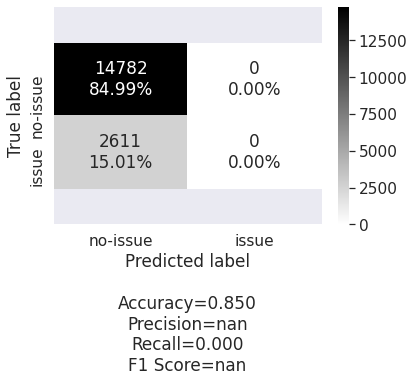

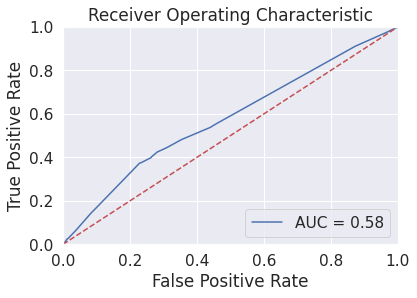

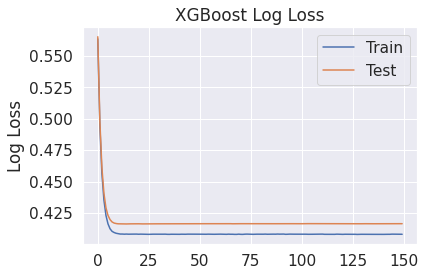

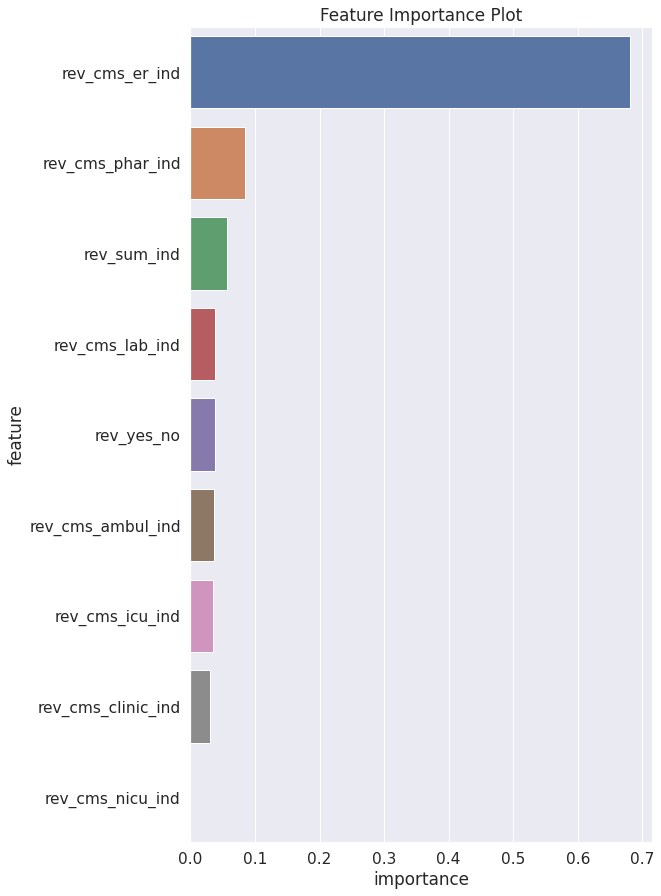

In [14]:
categorical_columns = rev_df.select_dtypes(include='category').columns
numerical_columns = rev_df.select_dtypes(exclude='category').columns

rev_df_encoded = label_encoder_fn(rev_df, categorical_columns, numerical_columns)

X_train, X_test, y_train, y_test = train_test_split_fn(rev_df_encoded)

feature_importance = xgboost_fn(X_train, X_test, y_train, y_test)

In [15]:
top_attributes = ['rev_cms_er_ind', 'rev_cms_phar_ind','rev_sum_ind','rev_cms_lab_ind','rev_cms_clinic_ind']
df_all = rev_df[top_attributes]
df_all = pd.concat([df_all,rev_df[['person_id_syn','transportation_issues']]],axis=1)

# Behavioral

In [16]:
#Bh codes
bh_df= df.filter(items=['person_id_syn',
'transportation_issues',
'bh_adtp_ind',
'bh_aoth_ind',
'bh_bipr_ind',
'bh_cdal_ind',
'bh_cdsb_ind',
'bh_cdto_ind',
'bh_dema_ind',
'mabh_seg'
])

#transforming the mabh_seg attribute
healthy_values = [s for s in list(bh_df.mabh_seg.value_counts().index) if 'H' in s]
chronic_values = [s for s in list(bh_df.mabh_seg.value_counts().index) if 'C' in s]

for (i,j) in zip(healthy_values, chronic_values):
    bh_df.loc[bh_df.mabh_seg == i, 'mabh_seg_h_c'] = 'H'
    bh_df.loc[bh_df.mabh_seg == j, 'mabh_seg_h_c'] = 'C'
    
bh_df['mabh_seg_h_c'] = bh_df.mabh_seg_h_c.fillna('U')
bh_df = bh_df.drop(['mabh_seg'],axis=1)

for i in bh_df.drop('person_id_syn',axis=1).columns:
#     print(i)
    bh_df[i] = bh_df[i].astype('category')
    df_one = bh_df[bh_df[i]==1]
    print("percentage of ",i, 'as Yes is', df_one.shape[0]/bh_df.shape[0])
    print("percentage of YES and Transportation Issue", df_one[df_one.transportation_issues ==1].shape[0]/bh_df.shape[0])
    print('-'*30)
    
bh_ind_columns  = [s for s in bh_df.columns if 'ind' in s]
bh_df['bh_sum_ind'] = bh_df[bh_ind_columns].sum(axis=1)
bh_df.loc[bh_df.bh_sum_ind > 0, 'bh_yes_no'] =1
bh_df['bh_yes_no'] = bh_df.bh_yes_no.fillna(0)
bh_df['bh_yes_no'] = bh_df['bh_yes_no'].astype('category')

percentage of  transportation_issues as Yes is 0.1465675846604956
percentage of YES and Transportation Issue 0.1465675846604956
------------------------------
percentage of  bh_adtp_ind as Yes is 0.01131202207784741
percentage of YES and Transportation Issue 0.003938366009314092
------------------------------
percentage of  bh_aoth_ind as Yes is 0.1769964928419479
percentage of YES and Transportation Issue 0.03671017075835106
------------------------------
percentage of  bh_bipr_ind as Yes is 0.029796469844190192
percentage of YES and Transportation Issue 0.010147760593342148
------------------------------
percentage of  bh_cdal_ind as Yes is 0.028962801126890127
percentage of YES and Transportation Issue 0.007143678491347094
------------------------------
percentage of  bh_cdsb_ind as Yes is 0.05313919392859196
percentage of YES and Transportation Issue 0.014574828954176968
------------------------------
percentage of  bh_cdto_ind as Yes is 0.1547892830449031
percentage of YES and Tra

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass scoring=roc_auc, n_jobs=-1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    4.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.9s finished


0.8493071925487266
0.8557657295080396


<Figure size 1440x1080 with 0 Axes>

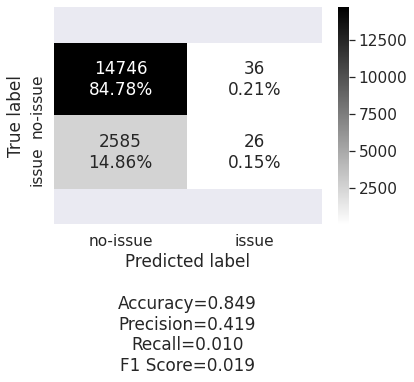

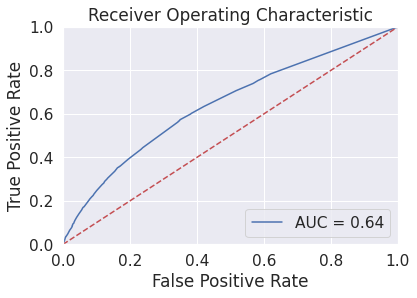

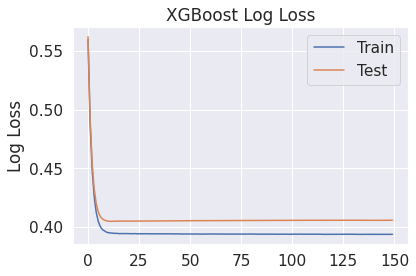

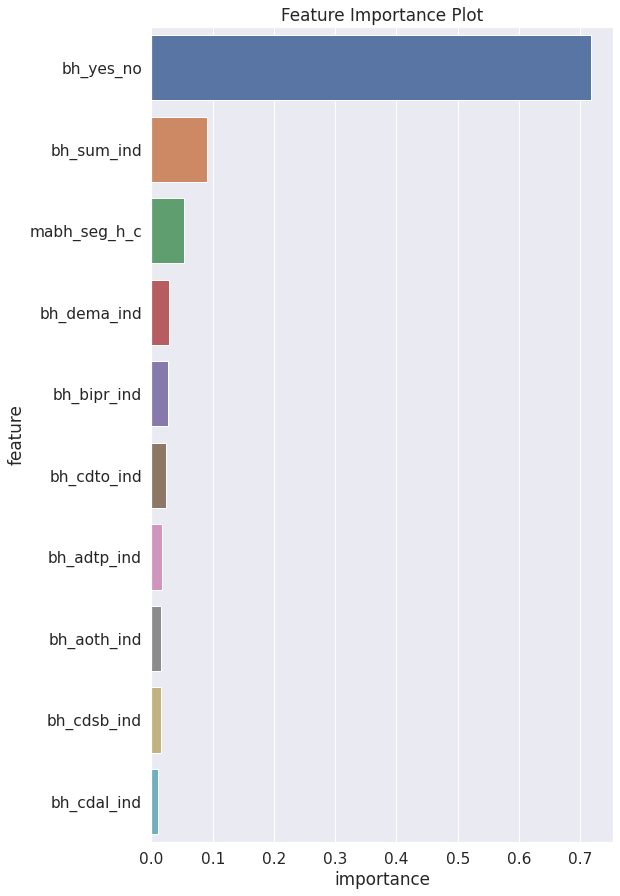

In [17]:
categorical_columns = bh_df.select_dtypes(include='category').columns
numerical_columns = bh_df.select_dtypes(exclude='category').columns

bh_df_encoded = label_encoder_fn(bh_df, categorical_columns, numerical_columns)

X_train, X_test, y_train, y_test = train_test_split_fn(bh_df_encoded)

feature_importance = xgboost_fn(X_train, X_test, y_train, y_test)

In [28]:
bh_df

,person_id_syn,transportation_issues,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,mabh_seg_h_c,bh_sum_ind,bh_yes_no
0,0002MOb79ST17bLYAe46eIc2,0,0,0,0,0,0,1,0,U,1.0,1.0
1,0004cMOS6bTLf34Y7AIca8f3,0,0,1,0,0,0,1,1,C,3.0,1.0
2,000536M9O3ST98LaYaeA29Ia,1,0,0,0,0,0,0,0,U,0.0,0.0
3,0009bMO9SfTLYe77A51I4ac3,0,0,0,0,0,0,0,0,H,0.0,0.0
4,000M7OeS66bTL8bY89Aa16Ie,0,0,0,0,0,0,1,0,U,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69567,ffe33MOS25dTf027LaY7A5I3,0,0,0,0,0,0,1,0,H,1.0,1.0
69568,fff1M4O1cfST49LY464A2Ieb,0,0,0,0,0,0,0,0,C,0.0,0.0
69569,fff5MO7e401STLYcAd8e581I,0,0,0,0,0,0,0,0,H,0.0,0.0
69570,fffMc37OSfTLfY7853dfA09I,0,0,0,0,0,0,0,0,H,0.0,0.0


In [23]:
feature_importance = ['bh_yes_no',
 'bh_sum_ind',
 'mabh_seg_h_c',
 'bh_dema_ind',
 'bh_bipr_ind',
 'bh_cdto_ind']

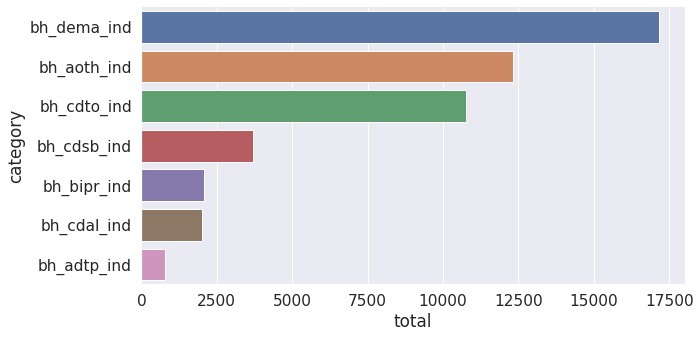

In [27]:
bh_df_viz_1 = bh_df_encoded.drop(['person_id_syn','bh_sum_ind','bh_yes_no','mabh_seg_h_c'],axis=1)
bh_df_viz = data_viz(bh_df_viz_1)

bh_df_viz_1 = bh_df_viz_1.groupby(['transportation_issues']).sum().transpose()
bh_df_viz_1.columns = ['no_issues','issues']
bh_df_viz_1.reset_index(inplace=True, drop=False)

bh_df_viz_1.columns = ['category','no_issues','issues']
bh_df_viz_1['total'] = bh_df_viz_1['no_issues'] + bh_df_viz_1['issues']
bh_df_viz_1 = bh_df_viz_1.sort_values('total',ascending=False)
sns.catplot(x="total", y="category", kind="bar",height=5, 
            aspect=2, data=bh_df_viz_1,legend_out=False)

# bh_df_viz_1[['index','total']].set_index('index').T.plot(kind='bar', stacked=True,height=5, aspect=4,legend_out=False)

In [25]:
bh_df_viz_1

,index,no_issues,issues
0,bh_adtp_ind,513,274
1,bh_aoth_ind,9760,2554
2,bh_bipr_ind,1367,706
3,bh_cdal_ind,1518,497
4,bh_cdsb_ind,2683,1014
5,bh_cdto_ind,8274,2495
6,bh_dema_ind,13540,3620


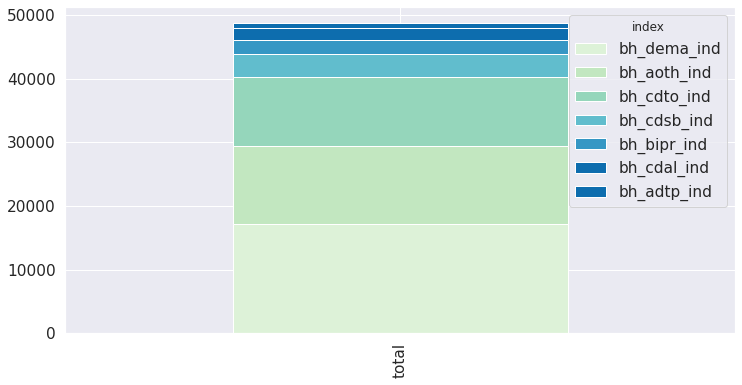

In [21]:
from matplotlib.colors import ListedColormap

bh_df_viz_1[['index','total']].set_index('index')\
  .reindex(bh_df_viz_1[['index','total']].set_index('index').sum().sort_values().index, axis=1)\
  .T.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("GnBu", 6)), 
          figsize=(12,6))

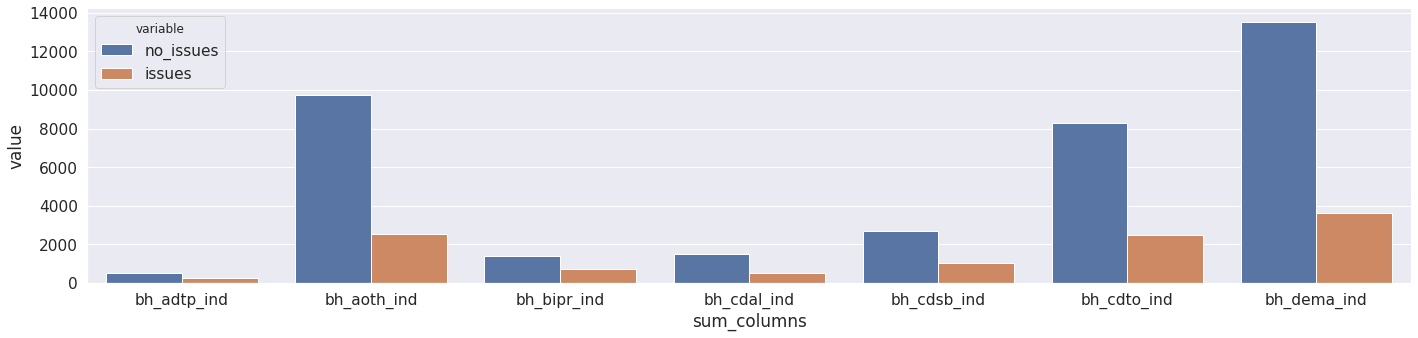

In [22]:
sns.catplot(x="sum_columns", y="value", hue="variable", kind="bar",height=5, 
            aspect=4, data=bh_df_viz,legend_out=False)

In [23]:
df_all = pd.concat([df_all,bh_df[feature_importance]],axis=1)
df_all.dtypes

rev_cms_er_ind           category
rev_cms_phar_ind         category
rev_sum_ind               float64
rev_cms_lab_ind          category
rev_cms_clinic_ind       category
person_id_syn              object
transportation_issues    category
bh_yes_no                category
bh_sum_ind                float64
mabh_seg_h_c             category
bh_dema_ind              category
bh_bipr_ind              category
bh_cdto_ind              category
dtype: object

## Prov

In [24]:
prov_df= df.filter(items=['person_id_syn',
'transportation_issues',
'prov_fb_ind',
'prov_pcp_ind',
'prov_sp_ind',
'prov_spec_addiction_all_ind',
'prov_spec_ambulance_ind',
'prov_spec_bh_psychiatric_ind',
'prov_spec_chiropractic_ind',
'prov_spec_home_health_ind',
'prov_spec_med_supply_ind',
'prov_spec_nurse_phy_assist_ind',
'prov_spec_pain_mgmt_ind',
'prov_spec_phy_general_ind',
'prov_spec_phy_geriatric_ind'
])

for i in prov_df.drop('person_id_syn',axis=1).columns:
#     print(i)
    prov_df[i] = prov_df[i].astype('category')
    df_one = prov_df[prov_df[i]==1]
    print("percentage of ",i, 'as Yes is', df_one.shape[0]/prov_df.shape[0])
    print("percentage of YES and Transportation Issue", df_one[df_one.transportation_issues ==1].shape[0]/prov_df.shape[0])
    print('-'*30)
    
prov_ind_columns  = [s for s in prov_df.columns if 'ind' in s]
prov_df['prov_sum_ind'] = prov_df[prov_ind_columns].sum(axis=1)
prov_df.loc[prov_df.prov_sum_ind > 0, 'prov_yes_no'] =1
prov_df['prov_yes_no'] = prov_df.prov_yes_no.fillna(0)
prov_df['prov_yes_no'] = prov_df['prov_yes_no'].astype('category')

percentage of  transportation_issues as Yes is 0.1465675846604956
percentage of YES and Transportation Issue 0.1465675846604956
------------------------------
percentage of  prov_fb_ind as Yes is 0.8038866210544472
percentage of YES and Transportation Issue 0.12033576726269189
------------------------------
percentage of  prov_pcp_ind as Yes is 0.9423331225205542
percentage of YES and Transportation Issue 0.13631920887713447
------------------------------
percentage of  prov_sp_ind as Yes is 0.9427930776749267
percentage of YES and Transportation Issue 0.137512217558788
------------------------------
percentage of  prov_spec_addiction_all_ind as Yes is 0.17731271201057897
percentage of YES and Transportation Issue 0.0288046915425746
------------------------------
percentage of  prov_spec_ambulance_ind as Yes is 0.12743632495831655
percentage of YES and Transportation Issue 0.03809003622146841
------------------------------
percentage of  prov_spec_bh_psychiatric_ind as Yes is 0.1286293

/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass scoring=roc_auc, n_jobs=-1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished


0.8499396308859886
0.8548458191992947


<Figure size 1440x1080 with 0 Axes>

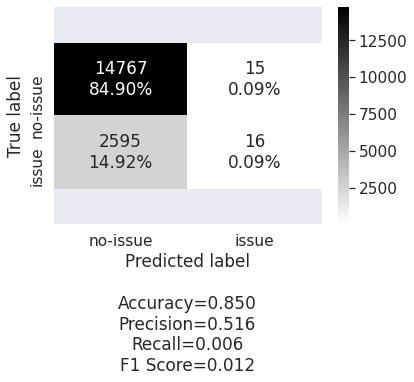

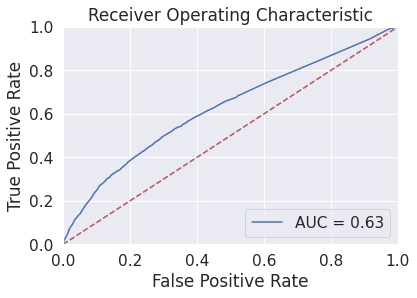

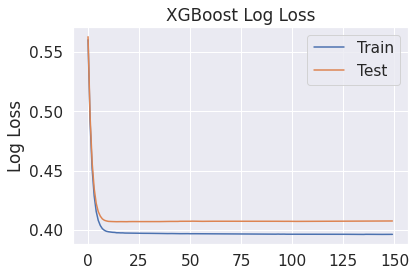

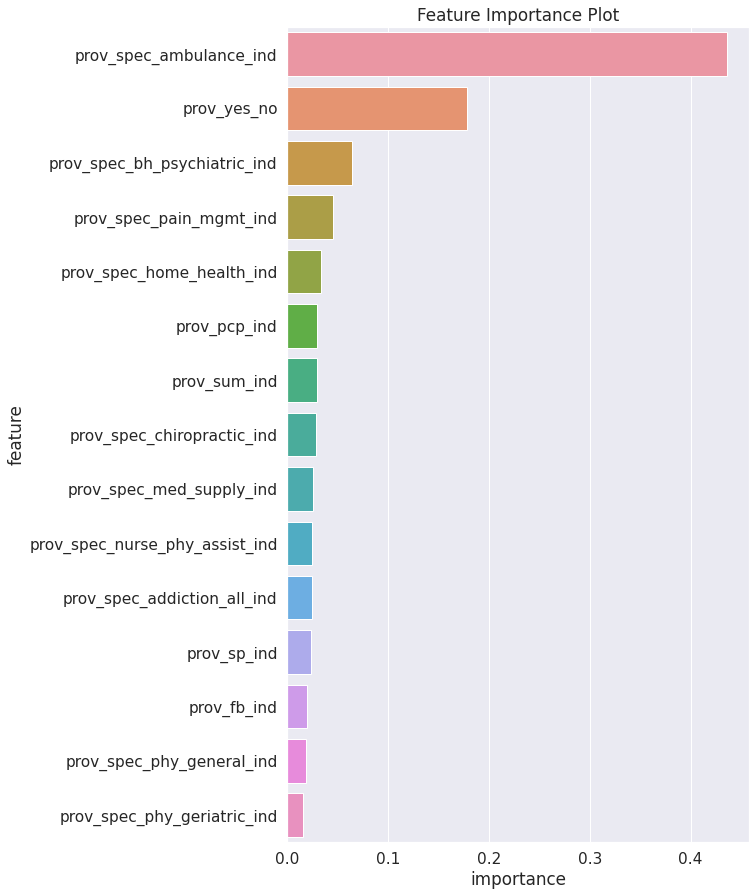

In [25]:
categorical_columns = prov_df.select_dtypes(include='category').columns
numerical_columns = prov_df.select_dtypes(exclude='category').columns

prov_df_encoded = label_encoder_fn(prov_df, categorical_columns, numerical_columns)

X_train, X_test, y_train, y_test = train_test_split_fn(prov_df_encoded)

feature_importance = xgboost_fn(X_train, X_test, y_train, y_test)

In [26]:
feature_importance = ['prov_spec_ambulance_ind',
 'prov_yes_no',
 'prov_spec_bh_psychiatric_ind',
 'prov_spec_pain_mgmt_ind']

In [27]:
# list(feature_importance.feature[0:4])

In [56]:
df_all = pd.concat([df_all,prov_df[feature_importance]],axis=1)
# df_all

### [### Physician E&M category

In [57]:
phy_df = df.filter(['phy_em_pe_ind',
'phy_em_pi_ind',
'phy_em_px_ind',
'hcc_weighted_sum','person_id_syn',
'transportation_issues'])


In [58]:
for i in phy_df.drop('person_id_syn',axis=1).columns:
#     print(i)
    phy_df[i] = phy_df[i].astype('category')
    df_one = phy_df[phy_df[i]==1]
    print("percentage of ",i, 'as Yes is', df_one.shape[0]/phy_df.shape[0])
    print("percentage of YES and Transportation Issue", df_one[df_one.transportation_issues ==1].shape[0]/phy_df.shape[0])
    print('-'*30)
    
phy_ind_columns  = [s for s in phy_df.columns if 'ind' in s]
phy_df['phy_sum_ind'] = phy_df[phy_ind_columns].sum(axis=1)
phy_df.loc[phy_df.phy_sum_ind > 0, 'phy_yes_no'] =1
phy_df['phy_yes_no'] = phy_df.phy_yes_no.fillna(0)
phy_df['phy_yes_no'] = phy_df['phy_yes_no'].astype('category')

percentage of  phy_em_pe_ind as Yes is 0.30049205361687686
percentage of YES and Transportation Issue 0.0
------------------------------
percentage of  phy_em_pi_ind as Yes is 0.1572874837396075
percentage of YES and Transportation Issue 0.0
------------------------------
percentage of  phy_em_px_ind as Yes is 0.969062835812454
percentage of YES and Transportation Issue 0.0
------------------------------
percentage of  hcc_weighted_sum as Yes is 0.07793676828233698
percentage of YES and Transportation Issue 0.0
------------------------------
percentage of  transportation_issues as Yes is 0.0
percentage of YES and Transportation Issue 0.0
------------------------------


In [ ]:
categorical_columns = phy_df.select_dtypes(include='category').columns
numerical_columns = phy_df.select_dtypes(exclude='category').columns

phy_df_encoded = label_encoder_fn(phy_df, categorical_columns, numerical_columns)
phy_df_encoded = phy_df_encoded.drop('hcc_weighted_sum',axis=1)
X_train, X_test, y_train, y_test = train_test_split_fn(phy_df_encoded)

feature_importance = xgboost_fn(X_train, X_test, y_train, y_test)

In [59]:
feature_importance=['phy_em_pe_ind',
 'phy_sum_ind']

In [60]:
df_all = pd.concat([df_all,phy_df[feature_importance]],axis=1)
# df_all

# Train

In [ ]:
# df_all = df_all.rename(columns={'person_id_syn':'person_id_syn_rev'})
# df_all.drop(['transportation_issues'],axis=1).to_pickle('df_rev_suraj.pkl')

# Test

In [61]:
df_all.shape

(17681, 19)

In [62]:
df_all = df_all.rename(columns={'person_id_syn':'person_id_syn_rev'})
df_all.drop(['transportation_issues'],axis=1).to_pickle('df_rev_suraj_test.pkl')

In [60]:
df_all.drop('transportation_issues',axis=1).to_csv("log_df_rev.csv",index=False)

In [61]:
df_all.columns

Index(['rev_cms_er_ind', 'rev_cms_phar_ind', 'rev_sum_ind', 'rev_cms_lab_ind',
       'rev_cms_clinic_ind', 'person_id_syn_rev', 'transportation_issues',
       'bh_yes_no', 'bh_sum_ind', 'mabh_seg_h_c', 'bh_dema_ind', 'bh_bipr_ind',
       'bh_cdto_ind', 'prov_spec_ambulance_ind', 'prov_yes_no',
       'prov_spec_bh_psychiatric_ind', 'prov_spec_pain_mgmt_ind',
       'phy_em_pe_ind', 'phy_sum_ind'],
      dtype='object')

## CMS

In [72]:
cms_all = [s for s in df if 'cms' in s]

cms_df = df[[s for s in cms_all if 'rev' not in s]]
cms_ind = cms_df[[s for s in cms_df if 'ind' in s]]
cms_df = pd.concat([cms_ind, df[['transportation_issues','person_id_syn']]],axis=1)

In [73]:
for i in cms_df.drop('person_id_syn',axis=1).columns:
#     print(i)
    cms_df[i] = cms_df[i].astype('category')
    df_one = cms_df[cms_df[i]==1]
    print("percentage of ",i, 'as Yes is', df_one.shape[0]/cms_df.shape[0])
    print("percentage of YES and Transportation Issue", df_one[df_one.transportation_issues ==1].shape[0]/cms_df.shape[0])
    print('-'*30)
    
cms_ind_columns  = [s for s in cms_df.columns if 'ind' in s]
cms_df['cms_sum_ind'] = cms_df[cms_ind_columns].sum(axis=1)
cms_df.loc[cms_df.cms_sum_ind > 0, 'cms_yes_no'] =1
cms_df['cms_yes_no'] = cms_df.cms_yes_no.fillna(0)
cms_df['cms_yes_no'] = cms_df['cms_yes_no'].astype('category')

percentage of  cms_disabled_ind as Yes is 0.30207554763410566
percentage of YES and Transportation Issue 0.07002817225320532
------------------------------
percentage of  cms_dual_eligible_ind as Yes is 0.16444834128672453
percentage of YES and Transportation Issue 0.04471626516414649
------------------------------
percentage of  cms_hospice_ind as Yes is 0.0005174495486690048
percentage of YES and Transportation Issue 7.18679928706951e-05
------------------------------
percentage of  cms_low_income_ind as Yes is 0.23756683723336974
percentage of YES and Transportation Issue 0.06077157477145978
------------------------------
percentage of  cmsd2_can_unc_neo/plycyth/myelo_ind as Yes is 0.09316966595756913
percentage of YES and Transportation Issue 0.00983154142471109
------------------------------
percentage of  cmsd2_eye_blindness_ind as Yes is 0.0822169838440752
percentage of YES and Transportation Issue 0.013539929856838958
------------------------------
percentage of  cmsd2_gus_m_ge

/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass scoring=roc_auc, n_jobs=-1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.8s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished


0.8497096533088024
0.8547883248049982


<Figure size 1440x1080 with 0 Axes>

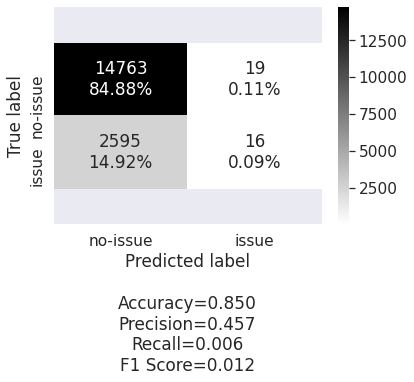

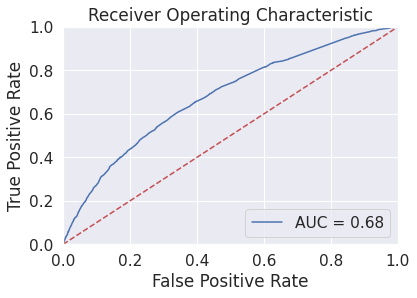

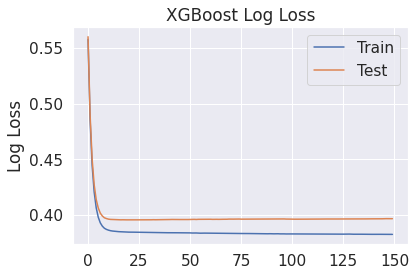

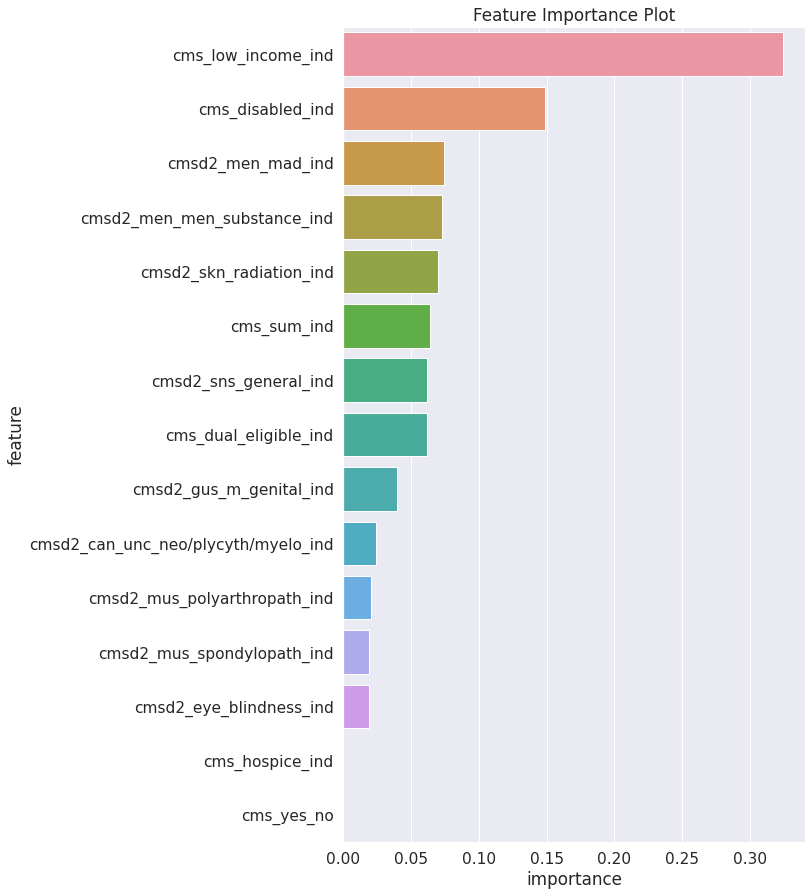

In [74]:
categorical_columns = cms_df.select_dtypes(include='category').columns
numerical_columns = cms_df.select_dtypes(exclude='category').columns

cms_df = label_encoder_fn(cms_df, categorical_columns, numerical_columns)
X_train, X_test, y_train, y_test = train_test_split_fn(cms_df)

feature_importance = xgboost_fn(X_train, X_test, y_train, y_test)

In [75]:
df_all = pd.concat([df_all,cms_df[list(feature_importance.feature[0:5])]],axis=1)
# df_all

In [76]:
cat_columns = list([s for s in df_all if 'ind' in s])
cat_columns.append(list([s for s in df_all if 'yes_no' in s]))
cat_columns.append('mabh_seg_h_c')


# cat_columns = sum( cat_columns, [])


num_columns = ['bh_sum_ind']

df_all = df_all.rename(columns={'person_id_syn': 'person_id_syn_rev'})

for i in cat_columns:
    print(i)
    df_all[i] = df_all[i].astype('category')
    
    
df_all.drop(['transportation_issues'],axis=1).to_pickle('df_rev_suraj.pkl')

rev_cms_er_ind
rev_cms_phar_ind
rev_sum_ind
rev_cms_lab_ind
rev_cms_clinic_ind
bh_sum_ind
bh_dema_ind
bh_bipr_ind
prov_spec_ambulance_ind
prov_spec_bh_psychiatric_ind
prov_spec_pain_mgmt_ind
phy_em_pe_ind
phy_sum_ind
cms_low_income_ind
cms_disabled_ind
cmsd2_men_mad_ind
cmsd2_men_men_substance_ind
cmsd2_skn_radiation_ind
['bh_yes_no', 'prov_yes_no']
mabh_seg_h_c


/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass scoring=roc_auc, n_jobs=-1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    5.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.4s finished


0.8505145748289542
0.8589854155886468


<Figure size 1440x1080 with 0 Axes>

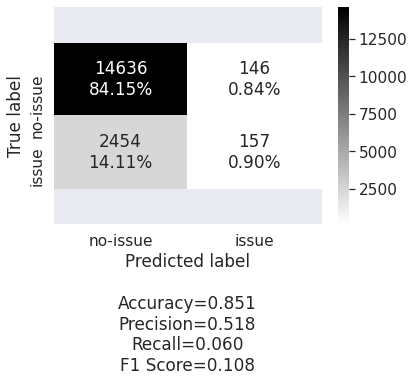

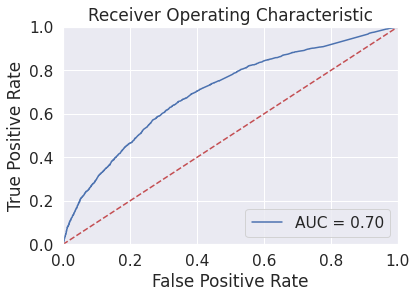

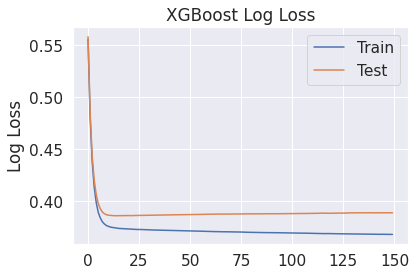

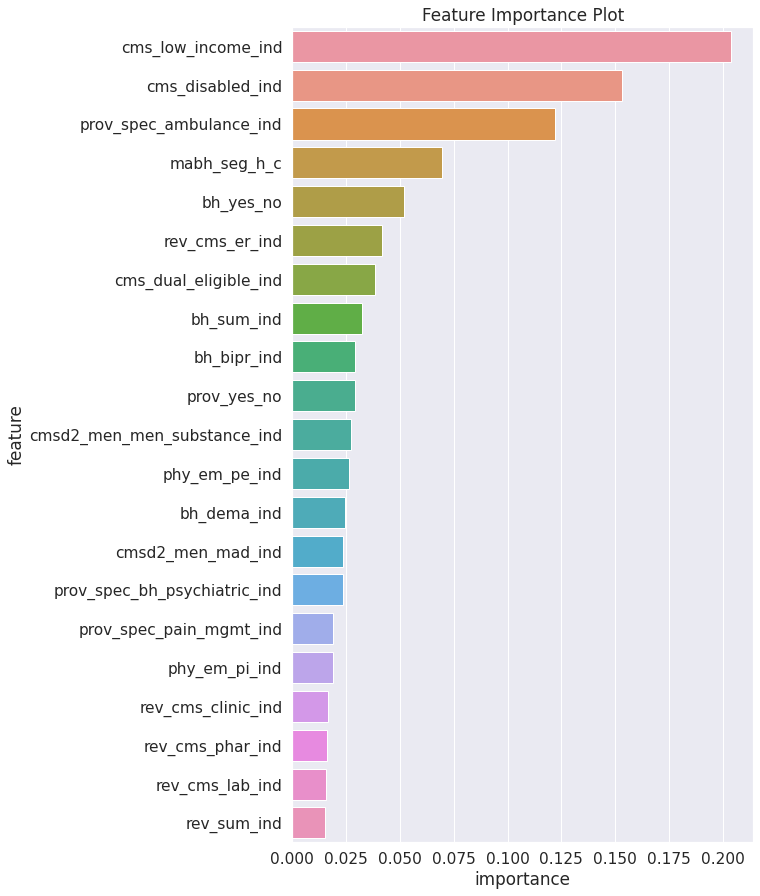

In [241]:
X_train, X_test, y_train, y_test = train_test_split_fn(df_all)

feature_importance = xgboost_fn(X_train, X_test, y_train, y_test)

In [8]:
rev_df.head(5)

,person_id_syn,transportation_issues,rev_cms_ambul_ind,rev_cms_clinic_ind,rev_cms_er_ind,rev_cms_icu_ind,rev_cms_lab_ind,rev_cms_nicu_ind,rev_cms_phar_ind
0,0002MOb79ST17bLYAe46eIc2,0,0,0,0,0,0,0,0
1,0004cMOS6bTLf34Y7AIca8f3,0,0,0,0,0,0,0,0
2,000536M9O3ST98LaYaeA29Ia,1,0,0,0,0,1,0,1
3,0009bMO9SfTLYe77A51I4ac3,0,0,0,0,0,0,0,0
4,000M7OeS66bTL8bY89Aa16Ie,0,0,0,1,0,1,0,1


In [96]:
# rev_df['rev_cms_total_ind_3']= rev_df['rev_cms_ambul_ind'] +  rev_df['rev_cms_er_ind'] + rev_df['rev_cms_icu_ind'] 
# rev_df['rev_cms_total_ind_next_3']= rev_df['rev_cms_clinic_ind'] +  rev_df['rev_cms_lab_ind'] + rev_df['rev_cms_phar_ind']
# rev_df['rev_cms_total_ind']= rev_df['rev_cms_clinic_ind'] +  rev_df['rev_cms_lab_ind'] + rev_df['rev_cms_phar_ind'] + rev_df['rev_cms_ambul_ind'] +  rev_df['rev_cms_er_ind'] + rev_df['rev_cms_icu_ind']

In [97]:
# rev_df['rev_cms_total_ind'].value_counts()

In [98]:
# conditions = [(rev_df['rev_cms_total_ind_3']>0),(rev_df['rev_cms_total_ind_3']<0)]

# # # create a list of the values we want to assign for each condition
# values = ['1', '0']

# # # create a new column and use np.select to assign values to it using our lists as arguments
# rev_df['rev_cms_total_ind_3'] = np.select(conditions, values)

In [99]:
# rev_df['rev_cms_total_ind_next_3'].value_counts()

In [100]:
# conditions = [(rev_df['rev_cms_total_ind_next_3']>0),(rev_df['rev_cms_total_ind_next_3']<0)]

# # # create a list of the values we want to assign for each condition
# values = ['1', '0']

# # # create a new column and use np.select to assign values to it using our lists as arguments
# rev_df['rev_cms_total_ind_next_3'] = np.select(conditions, values)

In [101]:
# rev_df['rev_cms_total_ind'].value_counts()

In [102]:
rev_df['transportation_issues'] = rev_df['transportation_issues'].astype('category')
rev_df['rev_cms_ambul_ind'] = rev_df['rev_cms_ambul_ind'].astype('category')
rev_df['rev_cms_clinic_ind'] = rev_df['rev_cms_clinic_ind'].astype('category')
rev_df['rev_cms_er_ind'] = rev_df['rev_cms_er_ind'].astype('category')
rev_df['rev_cms_icu_ind'] = rev_df['rev_cms_icu_ind'].astype('category')
rev_df['rev_cms_lab_ind'] = rev_df['rev_cms_lab_ind'].astype('category')
rev_df['rev_cms_nicu_ind'] = rev_df['rev_cms_nicu_ind'].astype('category')
rev_df['rev_cms_phar_ind'] = rev_df['rev_cms_phar_ind'].astype('category')
# rev_df['rev_cms_total_ind_next_3'] = rev_df['rev_cms_total_ind_next_3'].astype('category')
# rev_df['rev_cms_total_ind_3'] = rev_df['rev_cms_total_ind_3'].astype('category')
# rev_df['rev_cms_total_ind'] = rev_df['rev_cms_total_ind_3'].astype('category')

In [103]:
# rev_df.groupby(['rev_cms_total_ind_next_3','transportation_issues']).size().unstack().plot(kind='bar', stacked=False)
# rev_df.groupby(['rev_cms_total_ind_3','transportation_issues']).size().unstack().plot(kind='bar', stacked=False)
# rev_df.groupby(['rev_cms_er_ind','transportation_issues']).size().unstack().plot(kind='bar', stacked=False)
# rev_df.groupby(['rev_cms_icu_ind','transportation_issues']).size().unstack().plot(kind='bar', stacked=False)
# rev_df.groupby(['rev_cms_lab_ind','transportation_issues']).size().unstack().plot(kind='bar', stacked=False)
# #rev_df.groupby(['rev_cms_nicu_ind','transportation_issues']).size().unstack().plot(kind='bar', stacked=False)
# rev_df.groupby(['rev_cms_phar_ind','transportation_issues']).size().unstack().plot(kind='bar', stacked=False)
#rev_df.groupby(['rev_cms_ambul_ind','transportation_issues']).size().unstack().plot(kind='bar', stacked=False)

In [104]:
#rev_df.groupby(['transportation_issues','rev_cms_total_ind']).size().unstack().plot(kind='bar', stacked=False)
# rev_df.groupby(['rev_cms_total_ind','transportation_issues']).size().unstack().plot(kind='bar', stacked=False)

In [105]:
rev_df.dtypes

person_id_syn              object
transportation_issues    category
rev_cms_ambul_ind        category
rev_cms_clinic_ind       category
rev_cms_er_ind           category
rev_cms_icu_ind          category
rev_cms_lab_ind          category
rev_cms_nicu_ind         category
rev_cms_phar_ind         category
dtype: object

In [106]:
# Number of Rows having Transportion issue 
df_no_issue = rev_df[rev_df.transportation_issues == 0]
print(df_no_issue.shape)
# Number of Rows having no Transportion issue 
df_issue = rev_df[rev_df.transportation_issues == 1]
print(df_issue.shape)
print(rev_df.isna().sum())

(59375, 9)
(10197, 9)
person_id_syn            0
transportation_issues    0
rev_cms_ambul_ind        0
rev_cms_clinic_ind       0
rev_cms_er_ind           0
rev_cms_icu_ind          0
rev_cms_lab_ind          0
rev_cms_nicu_ind         0
rev_cms_phar_ind         0
dtype: int64


In [107]:
for i in rev_df.columns:
    if i=='person_id_syn':
            continue
    if i=='transportation_issues':
            continue
    if i=='rev_cms_total_ind':
        df_one = rev_df[rev_df[i] ==4]#[i ]==3]
        print("percentage of patients using",i,df_one.shape[0]/rev_df.shape[0])
        print('percentage of patients using',i,'and Transportation Issue', df_one[df_one.transportation_issues ==1].shape[0]/df_one.shape[0])
    else:
        try:
            df_one = rev_df[rev_df[i] !=0]
            #print("percentage of patients using",i,df_one.shape[0]/rev_df.shape[0])
            print('percentage of patients using',i,'and Transportation Issue', df_one[df_one.transportation_issues ==1].shape[0]/df_one.shape[0])
        except:
            continue
#evry variable has more than 10%. taking all.

percentage of patients using rev_cms_ambul_ind and Transportation Issue 0.28735632183908044
percentage of patients using rev_cms_clinic_ind and Transportation Issue 0.16775055679287304
percentage of patients using rev_cms_er_ind and Transportation Issue 0.2070431380126564
percentage of patients using rev_cms_icu_ind and Transportation Issue 0.22554347826086957
percentage of patients using rev_cms_lab_ind and Transportation Issue 0.16472199241149116
percentage of patients using rev_cms_phar_ind and Transportation Issue 0.18184102821856826


In [108]:
# percentage of people using rev_cms_ambul_ind and no Transportation Issue can be found by 1- above values 
# for i in rev_df.columns:
#     if i=='person_id_syn':
#             continue
#     if i=='transportation_issues':
#             continue
#     try:
#         df_one = rev_df[rev_df[i] !=0]
#         #print("percentage of patients issues in ",i,df_one.shape[0]/rev_df.shape[0])
#         print('percentage of people using',i,'and no Transportation Issue', df_one[df_one.transportation_issues ==0].shape[0]/df_one.shape[0])
#     except:
#         continue
# #evry variable has more than 10%. taking all.

In [109]:
for i in rev_df.columns:
    if i=='person_id_syn':
            continue
    if i=='transportation_issues':
            continue
    try:
        df_one = rev_df[rev_df[i] !=1]
        #print("percentage of patients issues in ",i,df_one.shape[0]/rev_df.shape[0])
        print('percentage of People not using', i ,' and have Transportation Issue', df_one[df_one.transportation_issues ==1].shape[0]/df_one.shape[0])
    except:
        continue
#evry variable has more than 10%. taking all.

percentage of People not using rev_cms_ambul_ind  and have Transportation Issue 0.14639130747643375
percentage of People not using rev_cms_clinic_ind  and have Transportation Issue 0.1424923303683137
percentage of People not using rev_cms_er_ind  and have Transportation Issue 0.1209510752798183
percentage of People not using rev_cms_icu_ind  and have Transportation Issue 0.14307798523143422
percentage of People not using rev_cms_lab_ind  and have Transportation Issue 0.12813233291810308
percentage of People not using rev_cms_nicu_ind  and have Transportation Issue 0.1465675846604956
percentage of People not using rev_cms_phar_ind  and have Transportation Issue 0.12301644374131071


## These values does show us that the people who used healthcare are facing more transportation issues. Order of importance of variables rev_cms_ambul_ind  , rev_cms_icu_ind  , rev_cms_er_ind, rev_cms_phar_ind   other's have only 2% of visible difference. 

In [110]:
#rev_df_2['rev_cms_new_total_ind']=rev_df[rev_df['rev_cms_total_ind']==4]

In [111]:
# conditions = [(rev_df['rev_cms_total_ind']==4),(rev_df['rev_cms_total_ind']!=4)]

# # create a list of the values we want to assign for each condition
# values = ['1', '0']

# # create a new column and use np.select to assign values to it using our lists as arguments
# rev_df['rev_cms_new_total_ind'] = np.select(conditions, values)

In [114]:
# rev_df['rev_cms_new_total_ind'].value_counts()

In [115]:
#rev_df.drop(['transportation_issues','rev_cms_clinic_ind','rev_cms_lab_ind','rev_cms_nicu_ind','rev_cms_total_ind'],axis=1).to_pickle('df_rev_suraj.pkl')

In [116]:
# # rev_df.head(2)
# rev_df = rev_df.drop(columns=['transportation_issues','person_id_syn'])

In [117]:
# rev_df.head()

In [118]:
# corr = rev_df.corr()#drop(['transportation_issues','person_id_syn']).corr()
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)#'rev_cms_er_ind','rev_cms_phar_ind','rev_cms_clinic_ind','rev_cms_lab_ind','rev_cms_nicu_ind','rev_cms_total_ind'],axis=1).to_pickle('df_rev_suraj.pkl')

In [152]:
#unbalanced sample
#rev_new_df=rev_df
#balanced sample
rev_df_no_issue_sample = df_no_issue.sample(n=10197)
rev_new_df = pd.concat([rev_df_no_issue_sample, df_issue])
#rev_new_df=rev_df

In [153]:
y = rev_new_df['transportation_issues']
#X = rev_new_df.drop(columns=['transportation_issues','rev_cms_er_ind','rev_cms_phar_ind','person_id_syn','rev_cms_clinic_ind','rev_cms_lab_ind','rev_cms_nicu_ind','rev_cms_total_ind'])
X = rev_new_df.drop(columns=['transportation_issues','person_id_syn','rev_cms_nicu_ind','rev_cms_clinic_ind'])#,'rev_cms_phar_ind','rev_cms_clinic_ind','rev_cms_lab_ind',])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [154]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred_test=logistic_regression.predict(X_test)
y_pred_train=logistic_regression.predict(X_train)

In [155]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
print('Accuracy: ',metrics.accuracy_score(y_train, y_pred_train))

Accuracy:  0.8498821364916921
Accuracy:  0.8546158416221085


In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
RF_clf = RandomForestClassifier(n_estimators=300,max_depth=10)
RF_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300)

In [157]:
y_rf_pred_test = RF_clf.predict(X_test)
y_rf_pred_train = RF_clf.predict(X_train)

print(classification_report(y_test, y_rf_pred_test))
print(classification_report(y_train, y_rf_pred_train))

print(metrics.accuracy_score(y_test, y_rf_pred_test))
print(metrics.accuracy_score(y_train, y_rf_pred_train))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     14782
           1       0.00      0.00      0.00      2611

    accuracy                           0.85     17393
   macro avg       0.42      0.50      0.46     17393
weighted avg       0.72      0.85      0.78     17393

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     44593
           1       1.00      0.00      0.00      7586

    accuracy                           0.85     52179
   macro avg       0.93      0.50      0.46     52179
weighted avg       0.88      0.85      0.79     52179

0.8498246420973955
0.8546350064202074


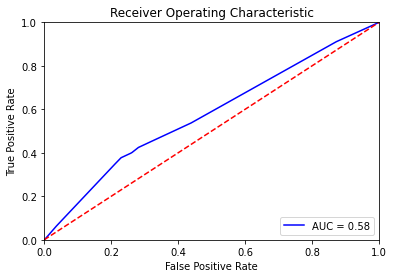

In [158]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = RF_clf.predict_proba(X_test)
preds = probs[:,1]
# preds = [1]*17119
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# BH CODES - Condition Related Features
-----------------------------------------------

In [179]:
#Bh codes
bh_df= df.filter(items=['person_id_syn',
'transportation_issues',
'bh_adtp_ind',
'bh_aoth_ind',
'bh_bipr_ind',
'bh_cdal_ind',
'bh_cdsb_ind',
'bh_cdto_ind',
'bh_dema_ind',
'mabh_seg'
])

In [180]:
bh_df.isna().sum()

person_id_syn            0
transportation_issues    0
bh_adtp_ind              0
bh_aoth_ind              0
bh_bipr_ind              0
bh_cdal_ind              0
bh_cdsb_ind              0
bh_cdto_ind              0
bh_dema_ind              0
mabh_seg                 0
dtype: int64

In [181]:
bh_df['transportation_issues'] = bh_df['transportation_issues'].astype('category')
bh_df['bh_adtp_ind'] = bh_df['bh_adtp_ind'].astype('category')
bh_df['bh_aoth_ind'] = bh_df['bh_aoth_ind'].astype('category')
bh_df['bh_bipr_ind'] = bh_df['bh_bipr_ind'].astype('category')
bh_df['bh_cdal_ind'] = bh_df['bh_cdal_ind'].astype('category')
bh_df['bh_cdsb_ind'] = bh_df['bh_cdsb_ind'].astype('category')
bh_df['bh_cdto_ind'] = bh_df['bh_cdto_ind'].astype('category')
bh_df['bh_dema_ind'] = bh_df['bh_dema_ind'].astype('category')

In [184]:
conditions = [(bh_df['mabh_seg']== 'H1' or'H2'or'H3'or'H4'or'H5'or'H6'or'H7'or'H8'),(bh_df['mabh_seg'] == ('C1','C2','C3','C4','C5','C6','C7'))]

# create a list of the values we want to assign for each condition
values = ['1', '0']

# create a new column and use np.select to assign values to it using our lists as arguments
bh_df['Healthy'] = np.select(conditions, values)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [183]:
bh_df['Healthy'].value_counts()

0    69572
Name: Healthy, dtype: int64

In [162]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# from collections import defaultdict
# bh_df['mabh_seg'] = LabelEncoder().fit(bh_df['mabh_seg']).transform(bh_df['mabh_seg'])
# bh_df['mabh_seg'] = bh_df['mabh_seg'].astype('category')

In [163]:
bh_df.dtypes

person_id_syn            object
transportation_issues     int64
bh_adtp_ind               int64
bh_aoth_ind               int64
bh_bipr_ind               int64
bh_cdal_ind               int64
bh_cdsb_ind               int64
bh_cdto_ind               int64
bh_dema_ind               int64
mabh_seg                 object
dtype: object

In [164]:
bh_df.isna().sum()

person_id_syn            0
transportation_issues    0
bh_adtp_ind              0
bh_aoth_ind              0
bh_bipr_ind              0
bh_cdal_ind              0
bh_cdsb_ind              0
bh_cdto_ind              0
bh_dema_ind              0
mabh_seg                 0
dtype: int64

In [165]:
for i in bh_df.columns:
    if i=='person_id_syn':
            continue
    if i=='transportation_issues':
            continue
    try:
        df_one = bh_df[bh_df[i] !=0]
        print("percentage of patients having",i,"in ",i,df_one.shape[0]/bh_df.shape[0])
        print("percentage of patients having",i," and Transportation Issue", df_one[df_one.transportation_issues ==1].shape[0]/df_one.shape[0])
    except:
        continue
#every variable has more than 14%. taking all.

percentage of patients having bh_adtp_ind in  bh_adtp_ind 0.01131202207784741
percentage of patients having bh_adtp_ind  and Transportation Issue 0.34815756035578144
percentage of patients having bh_aoth_ind in  bh_aoth_ind 0.1769964928419479
percentage of patients having bh_aoth_ind  and Transportation Issue 0.20740620432028586
percentage of patients having bh_bipr_ind in  bh_bipr_ind 0.029796469844190192
percentage of patients having bh_bipr_ind  and Transportation Issue 0.3405692233478051
percentage of patients having bh_cdal_ind in  bh_cdal_ind 0.028962801126890127
percentage of patients having bh_cdal_ind  and Transportation Issue 0.24665012406947892
percentage of patients having bh_cdsb_ind in  bh_cdsb_ind 0.05313919392859196
percentage of patients having bh_cdsb_ind  and Transportation Issue 0.27427644035704624
percentage of patients having bh_cdto_ind in  bh_cdto_ind 0.1547892830449031
percentage of patients having bh_cdto_ind  and Transportation Issue 0.23168353607577305
perce

In [46]:
for i in bh_df.columns:
    if i=='person_id_syn':
            continue
    if i=='transportation_issues':
            continue
    try:
        df_one = bh_df[bh_df[i] ==0]
        #print("percentage of patients having",i,"in ",i,df_one.shape[0]/bh_df.shape[0])
        print("percentage of patients not having ",i," and Transportation Issue", df_one[df_one.transportation_issues ==1].shape[0]/df_one.shape[0])
    except:
        continue
#every variable has more than 14%. taking all.

percentage of patients not having  bh_adtp_ind  and Transportation Issue 0.1442611034382496
percentage of patients not having  bh_aoth_ind  and Transportation Issue 0.13348353068566837
percentage of patients not having  bh_bipr_ind  and Transportation Issue 0.14060949051097052
percentage of patients not having  bh_cdal_ind  and Transportation Issue 0.14358245629616473
percentage of patients not having  bh_cdsb_ind  and Transportation Issue 0.13940037950664136
percentage of patients not having  bh_cdto_ind  and Transportation Issue 0.1309797119194599
percentage of patients not having  bh_dema_ind  and Transportation Issue 0.12548652980233535


In [47]:
## From the above we can see bh_adtp_ind , bh_bipr_ind , bh_cdsb_ind , bh_cdal_ind, # remaining bh_cdto_ind , bh_aoth_ind, bh_dema_ind    

In [48]:
bh_df['bh_others_ind']=bh_df['bh_cdto_ind']+bh_df['bh_aoth_ind']+bh_df['bh_dema_ind']

In [49]:
bh_df['bh_others_ind'].value_counts()

0    41257
1    18253
2     8196
3     1866
Name: bh_others_ind, dtype: int64

In [50]:
conditions = [(bh_df['bh_others_ind']==3),(bh_df['bh_others_ind']!=3)]

# create a list of the values we want to assign for each condition
values = ['1', '0']

# create a new column and use np.select to assign values to it using our lists as arguments
bh_df['bh_others_ind'] = np.select(conditions, values)

In [51]:
bh_df['transportation_issues'] = bh_df['transportation_issues'].astype('category')
bh_df['bh_adtp_ind'] = bh_df['bh_adtp_ind'].astype('category')
bh_df['bh_aoth_ind'] = bh_df['bh_aoth_ind'].astype('category')
bh_df['bh_bipr_ind'] = bh_df['bh_bipr_ind'].astype('category')
bh_df['bh_cdal_ind'] = bh_df['bh_cdal_ind'].astype('category')
bh_df['bh_cdsb_ind'] = bh_df['bh_cdsb_ind'].astype('category')
bh_df['bh_cdto_ind'] = bh_df['bh_cdto_ind'].astype('category')
bh_df['bh_dema_ind'] = bh_df['bh_dema_ind'].astype('category')
bh_df['bh_others_ind'] = bh_df['bh_others_ind'].astype('category')

In [52]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
from collections import defaultdict
bh_df['mabh_seg'] = LabelEncoder().fit(bh_df['mabh_seg']).transform(bh_df['mabh_seg'])
bh_df['mabh_seg'] = bh_df['mabh_seg'].astype('category')

In [53]:
bh_df['mabh_seg'].value_counts()

8     16418
15    12742
12     7415
7      6715
3      6462
1      5898
13     4148
4      2898
10     2203
2      1285
9      1077
14      690
5       491
11      471
0       347
6       312
Name: mabh_seg, dtype: int64

In [54]:
bh_df.drop(['transportation_issues','bh_cdto_ind','bh_aoth_ind','bh_dema_ind'],axis=1).to_pickle('df_bh_codes_suraj.pkl')

In [55]:
df_no_issue = bh_df[bh_df.transportation_issues == 0]
print(df_no_issue.shape)
df_issue = bh_df[bh_df.transportation_issues == 1]
print(df_issue.shape)

(59375, 11)
(10197, 11)


In [56]:
bh_df_no_issue_sample = df_no_issue.sample(n=10197)
bh_new_df = pd.concat([bh_df_no_issue_sample, df_issue])

In [57]:
y = bh_new_df['transportation_issues']
X = bh_new_df.drop(columns=['transportation_issues','person_id_syn','bh_cdto_ind','bh_aoth_ind','bh_dema_ind'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [58]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred_test=logistic_regression.predict(X_test)
y_pred_train=logistic_regression.predict(X_train)

In [59]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
print('Accuracy: ',metrics.accuracy_score(y_train, y_pred_train))

Accuracy:  0.5573641890566777
Accuracy:  0.5616214449166395


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
RF_clf = RandomForestClassifier(n_estimators=300,max_depth=10)
RF_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300)

In [61]:
y_rf_pred_test = RF_clf.predict(X_test)
y_rf_pred_train = RF_clf.predict(X_train)

print(classification_report(y_test, y_rf_pred_test))
print(classification_report(y_train, y_rf_pred_train))

print(metrics.accuracy_score(y_test, y_rf_pred_test))
print(metrics.accuracy_score(y_train, y_rf_pred_train))

              precision    recall  f1-score   support

           0       0.60      0.57      0.59      2550
           1       0.59      0.62      0.61      2549

    accuracy                           0.60      5099
   macro avg       0.60      0.60      0.60      5099
weighted avg       0.60      0.60      0.60      5099

              precision    recall  f1-score   support

           0       0.61      0.58      0.59      7647
           1       0.60      0.63      0.61      7648

    accuracy                           0.60     15295
   macro avg       0.60      0.60      0.60     15295
weighted avg       0.60      0.60      0.60     15295

0.5961953324181212
0.6034651847008826


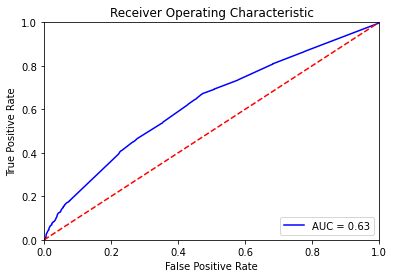

In [62]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = RF_clf.predict_proba(X_test)
preds = probs[:,1]
# preds = [1]*17119
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Utilization by Category (IP admits/ER visits/Outpatient/Ambulance etc.) - BH and Total

In [63]:
'''med_ambulance_visit_ct_pmpm	 Per Member Per Month Visits for non-BH related claims, broken out by utilization category	Not sure
med_er_visit_ct_pmpm	 Per Member Per Month Visits for non-BH related claims, broken out by utilization category	Not sure
med_ip_acute_admit_ct_pmpm	 Per Member Per Month IP Admit Count for non-BH related claims, broken out by utilization category	Not sure
med_ip_acute_admit_days_pmpm	 Per Member Per Month Admitted IP Days for non-BH related claims, broken out by utilization category	Not sure
med_ip_ltach_admit_ct_pmpm	 Per Member Per Month IP Admit Count for non-BH related claims, broken out by utilization category	Not sure
med_ip_ltach_admit_days_pmpm	 Per Member Per Month Admitted IP Days for non-BH related claims, broken out by utilization category	Not sure
med_ip_maternity_admit_ct_pmpm	 Per Member Per Month IP Admit Count for non-BH related claims, broken out by utilization category	Not sure
med_ip_maternity_admit_days_pmpm	 Per Member Per Month Admitted IP Days for non-BH related claims, broken out by utilization category	Not sure
med_ip_mhsa_admit_ct_pmpm	 Per Member Per Month IP Admit Count for non-BH related claims, broken out by utilization category	Not sure
med_ip_mhsa_admit_days_pmpm	 Per Member Per Month Admitted IP Days for non-BH related claims, broken out by utilization category	Not sure
med_ip_rehab_admit_ct_pmpm	 Per Member Per Month IP Admit Count for non-BH related claims, broken out by utilization category	Not sure
med_ip_rehab_admit_days_pmpm	 Per Member Per Month Admitted IP Days for non-BH related claims, broken out by utilization category	Not sure
med_ip_snf_admit_ct_pmpm	 Per Member Per Month IP Admit Count for non-BH related claims, broken out by utilization category	Not sure
med_ip_snf_admit_days_pmpm	 Per Member Per Month Admitted IP Days for non-BH related claims, broken out by utilization category	Not sure
med_outpatient_visit_ct_pmpm	 Per Member Per Month Visits for non-BH related claims, broken out by utilization category	Not sure
med_physician_office_visit_ct_pmpm	 Per Member Per Month Visits for non-BH related claims, broken out by utilization category	Not sure
med_urgent_care_visit_ct_pmpm	 Per Member Per Month Visits for non-BH related claims, broken out by utilization category	Not sure
'''

'med_ambulance_visit_ct_pmpm\t Per Member Per Month Visits for non-BH related claims, broken out by utilization category\tNot sure\nmed_er_visit_ct_pmpm\t Per Member Per Month Visits for non-BH related claims, broken out by utilization category\tNot sure\nmed_ip_acute_admit_ct_pmpm\t Per Member Per Month IP Admit Count for non-BH related claims, broken out by utilization category\tNot sure\nmed_ip_acute_admit_days_pmpm\t Per Member Per Month Admitted IP Days for non-BH related claims, broken out by utilization category\tNot sure\nmed_ip_ltach_admit_ct_pmpm\t Per Member Per Month IP Admit Count for non-BH related claims, broken out by utilization category\tNot sure\nmed_ip_ltach_admit_days_pmpm\t Per Member Per Month Admitted IP Days for non-BH related claims, broken out by utilization category\tNot sure\nmed_ip_maternity_admit_ct_pmpm\t Per Member Per Month IP Admit Count for non-BH related claims, broken out by utilization category\tNot sure\nmed_ip_maternity_admit_days_pmpm\t Per Mem

In [64]:
util_df= df.filter(items=['person_id_syn',
'transportation_issues',
'med_ambulance_visit_ct_pmpm',
'med_er_visit_ct_pmpm',
'med_ip_acute_admit_ct_pmpm',
'med_ip_acute_admit_days_pmpm',
'med_ip_ltach_admit_ct_pmpm',
'med_ip_ltach_admit_days_pmpm',
'med_ip_maternity_admit_ct_pmpm',
'med_ip_maternity_admit_days_pmpm',
'med_ip_mhsa_admit_ct_pmpm',
'med_ip_mhsa_admit_days_pmpm',
'med_ip_rehab_admit_ct_pmpm',
'med_ip_rehab_admit_days_pmpm',
'med_ip_snf_admit_ct_pmpm',
'med_ip_snf_admit_days_pmpm',
'med_outpatient_visit_ct_pmpm',
'med_physician_office_visit_ct_pmpm',
'med_urgent_care_visit_ct_pmpm',
'total_ambulance_visit_ct_pmpm',
'total_er_visit_ct_pmpm',
'total_ip_acute_admit_ct_pmpm',
'total_ip_acute_admit_days_pmpm',
'total_ip_ltach_admit_ct_pmpm',
'total_ip_ltach_admit_days_pmpm',
'total_ip_maternity_admit_ct_pmpm',
'total_ip_maternity_admit_days_pmpm',
'total_ip_mhsa_admit_ct_pmpm',
'total_ip_mhsa_admit_days_pmpm',
'total_ip_rehab_admit_ct_pmpm',
'total_ip_rehab_admit_days_pmpm',
'total_ip_snf_admit_ct_pmpm',
'total_ip_snf_admit_days_pmpm',
'total_outpatient_visit_ct_pmpm',
'total_physician_office_visit_ct_pmpm',
'total_urgent_care_visit_ct_pmpm'])

In [65]:
util_df['med_inpatient_visit_ct_pmpm'] = util_df['med_ip_acute_admit_ct_pmpm'] + util_df['med_ip_ltach_admit_ct_pmpm'] + util_df['med_ip_maternity_admit_ct_pmpm'] + util_df['med_ip_mhsa_admit_ct_pmpm'] +util_df['med_ip_rehab_admit_ct_pmpm'] + util_df['med_ip_snf_admit_ct_pmpm']
util_df['med_inpatient_adnit_days_pmpm'] = util_df['med_ip_acute_admit_days_pmpm'] + util_df['med_ip_ltach_admit_days_pmpm'] + util_df['med_ip_maternity_admit_days_pmpm'] + util_df['med_ip_mhsa_admit_days_pmpm'] +  util_df['med_ip_rehab_admit_days_pmpm'] + util_df['med_ip_snf_admit_days_pmpm'] 
                    
util_df=util_df.drop(columns=[                 
'med_ip_acute_admit_ct_pmpm',
'med_ip_acute_admit_days_pmpm',
'med_ip_ltach_admit_ct_pmpm',
'med_ip_ltach_admit_days_pmpm',
'med_ip_maternity_admit_ct_pmpm',
'med_ip_maternity_admit_days_pmpm',
'med_ip_mhsa_admit_ct_pmpm',
'med_ip_mhsa_admit_days_pmpm',
'med_ip_rehab_admit_ct_pmpm',
'med_ip_rehab_admit_days_pmpm',
'med_ip_snf_admit_ct_pmpm',
'med_ip_snf_admit_days_pmpm'])

In [66]:
util_df['total_inpatient_visit_ct_pmpm'] = util_df['total_ip_acute_admit_ct_pmpm'] + util_df['total_ip_ltach_admit_ct_pmpm'] + util_df['total_ip_maternity_admit_ct_pmpm'] + util_df['total_ip_mhsa_admit_ct_pmpm'] +util_df['total_ip_rehab_admit_ct_pmpm'] + util_df['total_ip_snf_admit_ct_pmpm']
util_df['total_inpatient_adnit_days_pmpm'] = util_df['total_ip_acute_admit_days_pmpm'] + util_df['total_ip_ltach_admit_days_pmpm'] + util_df['total_ip_maternity_admit_days_pmpm'] + util_df['total_ip_mhsa_admit_days_pmpm'] +  util_df['total_ip_rehab_admit_days_pmpm'] + util_df['total_ip_snf_admit_days_pmpm'] 
                    
util_df=util_df.drop(columns=[                 
'total_ip_acute_admit_ct_pmpm',
'total_ip_acute_admit_days_pmpm',
'total_ip_ltach_admit_ct_pmpm',
'total_ip_ltach_admit_days_pmpm',
'total_ip_maternity_admit_ct_pmpm',
'total_ip_maternity_admit_days_pmpm',
'total_ip_mhsa_admit_ct_pmpm',
'total_ip_mhsa_admit_days_pmpm',
'total_ip_rehab_admit_ct_pmpm',
'total_ip_rehab_admit_days_pmpm',
'total_ip_snf_admit_ct_pmpm',
'total_ip_snf_admit_days_pmpm'])

In [67]:
util_df.isna().sum()

person_id_syn                           0
transportation_issues                   0
med_ambulance_visit_ct_pmpm             0
med_er_visit_ct_pmpm                    0
med_outpatient_visit_ct_pmpm            0
med_physician_office_visit_ct_pmpm      0
med_urgent_care_visit_ct_pmpm           0
total_ambulance_visit_ct_pmpm           0
total_er_visit_ct_pmpm                  0
total_outpatient_visit_ct_pmpm          0
total_physician_office_visit_ct_pmpm    0
total_urgent_care_visit_ct_pmpm         0
med_inpatient_visit_ct_pmpm             0
med_inpatient_adnit_days_pmpm           0
total_inpatient_visit_ct_pmpm           0
total_inpatient_adnit_days_pmpm         0
dtype: int64

In [68]:
for i in util_df.columns:
    if i=='person_id_syn':
            continue
    if i=='transportation_issues':
            continue
    df_one = util_df[util_df[i] !=0]
    print("percentage of patients having,", i,' issues in',df_one.shape[0]/util_df.shape[0])
    print("percentage of patients having,", i,'and Transportation Issue', df_one[df_one.transportation_issues ==1].shape[0]/df_one.shape[0])

percentage of patients having, med_ambulance_visit_ct_pmpm  issues in 0.13347323635945496
percentage of patients having, med_ambulance_visit_ct_pmpm and Transportation Issue 0.30185225069997845
percentage of patients having, med_er_visit_ct_pmpm  issues in 0.23046627953774507
percentage of patients having, med_er_visit_ct_pmpm and Transportation Issue 0.21155045528252464
percentage of patients having, med_outpatient_visit_ct_pmpm  issues in 0.8999597539239924
percentage of patients having, med_outpatient_visit_ct_pmpm and Transportation Issue 0.14532358014438126
percentage of patients having, med_physician_office_visit_ct_pmpm  issues in 0.9381791525326281
percentage of patients having, med_physician_office_visit_ct_pmpm and Transportation Issue 0.14448989597217754
percentage of patients having, med_urgent_care_visit_ct_pmpm  issues in 0.07379405507962973
percentage of patients having, med_urgent_care_visit_ct_pmpm and Transportation Issue 0.1386832878846903
percentage of patients havi

In [70]:
util_df['Non-BH_ambulance_visit_ct_pmpm'] = util_df['total_ambulance_visit_ct_pmpm'] - util_df['med_ambulance_visit_ct_pmpm'] 
util_df['Non-BH_er_visit_ct_pmpm'] = util_df['total_er_visit_ct_pmpm'] - util_df['med_er_visit_ct_pmpm']
util_df['Non-BH_outpatient_visit_ct_pmpm'] = util_df['total_outpatient_visit_ct_pmpm'] - util_df['med_outpatient_visit_ct_pmpm']         
util_df['Non-BH_physician_office_visit_ct_pmpm'] = util_df['total_physician_office_visit_ct_pmpm'] -util_df['med_physician_office_visit_ct_pmpm']   
util_df['Non-BH_urgent_care_visit_ct_pmpm'] = util_df['total_urgent_care_visit_ct_pmpm'] - util_df['med_urgent_care_visit_ct_pmpm']
util_df['Non-BH_inpatient_visit_ct_pmpm'] = util_df['total_inpatient_visit_ct_pmpm'] - util_df['med_inpatient_visit_ct_pmpm']
util_df['Non-BH_inpatient_adnit_days_pmpm'] = util_df['total_inpatient_adnit_days_pmpm'] - util_df['med_inpatient_adnit_days_pmpm'] 

In [71]:
util_df=util_df.drop(columns=['total_ambulance_visit_ct_pmpm','total_er_visit_ct_pmpm', 'total_outpatient_visit_ct_pmpm','total_physician_office_visit_ct_pmpm','total_urgent_care_visit_ct_pmpm','total_inpatient_visit_ct_pmpm','total_inpatient_adnit_days_pmpm'])

In [72]:
util_df.isna().sum()

person_id_syn                            0
transportation_issues                    0
med_ambulance_visit_ct_pmpm              0
med_er_visit_ct_pmpm                     0
med_outpatient_visit_ct_pmpm             0
med_physician_office_visit_ct_pmpm       0
med_urgent_care_visit_ct_pmpm            0
med_inpatient_visit_ct_pmpm              0
med_inpatient_adnit_days_pmpm            0
Non-BH_ambulance_visit_ct_pmpm           0
Non-BH_er_visit_ct_pmpm                  0
Non-BH_outpatient_visit_ct_pmpm          0
Non-BH_physician_office_visit_ct_pmpm    0
Non-BH_urgent_care_visit_ct_pmpm         0
Non-BH_inpatient_visit_ct_pmpm           0
Non-BH_inpatient_adnit_days_pmpm         0
dtype: int64

In [73]:
for i in util_df.columns:
    if i=='person_id_syn':
            continue
    if i=='transportation_issues':
            continue
    df_one = util_df[util_df[i] !=0]
    print("percentage of patients having issues in ",i,df_one.shape[0]/util_df.shape[0])
    print("percentage of having ",i, " and Transportation Issue", df_one[df_one.transportation_issues ==1].shape[0]/df_one.shape[0])

percentage of patients having issues in  med_ambulance_visit_ct_pmpm 0.13347323635945496
percentage of having  med_ambulance_visit_ct_pmpm  and Transportation Issue 0.30185225069997845
percentage of patients having issues in  med_er_visit_ct_pmpm 0.23046627953774507
percentage of having  med_er_visit_ct_pmpm  and Transportation Issue 0.21155045528252464
percentage of patients having issues in  med_outpatient_visit_ct_pmpm 0.8999597539239924
percentage of having  med_outpatient_visit_ct_pmpm  and Transportation Issue 0.14532358014438126
percentage of patients having issues in  med_physician_office_visit_ct_pmpm 0.9381791525326281
percentage of having  med_physician_office_visit_ct_pmpm  and Transportation Issue 0.14448989597217754
percentage of patients having issues in  med_urgent_care_visit_ct_pmpm 0.07379405507962973
percentage of having  med_urgent_care_visit_ct_pmpm  and Transportation Issue 0.1386832878846903
percentage of patients having issues in  med_inpatient_visit_ct_pmpm 0.1

In [ ]:
# From the above variables 
Non-BH_er_visit_ct_pmpm, Non-BH_ambulance_visit_ct_pmpm, Non-BH_inpatient_visit_ct_pmpm, Non-BH_inpatient_adnit_days_pmpm, Non-BH_urgent_care_visit_ct_pmpm, 

In [ ]:
'''med_ambulance_visit_ct_pmpm           med_er_visit_ct_pmpm                     med_outpatient_visit_ct_pmpm             med_physician_office_visit_ct_pmpm       med_urgent_care_visit_ct_pmpm            med_inpatient_visit_ct_pmpm              
med_inpatient_adnit_days_pmpm            Non-BH_ambulance_visit_ct_pmpm           
Non-BH_er_visit_ct_pmpm                  Non-BH_outpatient_visit_ct_pmpm          
Non-BH_physician_office_visit_ct_pmpm    Non-BH_urgent_care_visit_ct_pmpm         
Non-BH_inpatient_visit_ct_pmpm           Non-BH_inpatient_adnit_days_pmpm         '''

In [88]:
util_df['total_med_non_med_pmpm']=util_df['med_ambulance_visit_ct_pmpm']+util_df['Non-BH_ambulance_visit_ct_pmpm']+util_df['Non-BH_er_visit_ct_pmpm']+util_df['Non-BH_physician_office_visit_ct_pmpm']+util_df['Non-BH_inpatient_visit_ct_pmpm']+util_df['Non-BH_inpatient_adnit_days_pmpm']

In [89]:
util_df.drop(['transportation_issues','med_er_visit_ct_pmpm','med_outpatient_visit_ct_pmpm','med_physician_office_visit_ct_pmpm','med_urgent_care_visit_ct_pmpm','med_inpatient_visit_ct_pmpm','med_inpatient_adnit_days_pmpm','Non-BH_outpatient_visit_ct_pmpm'],axis=1).to_pickle('df_util_suraj.pkl') ## sub total - med 

In [90]:
df_no_issue = util_df[util_df.transportation_issues == 0]
print(df_no_issue.shape)
df_issue = util_df[util_df.transportation_issues == 1]
print(df_issue.shape)

(59375, 17)
(10197, 17)


In [91]:
util_df_no_issue_sample = df_no_issue.sample(n=10197)
util_new_df = pd.concat([util_df_no_issue_sample, df_issue])
util_new_df.shape

(20394, 17)

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [93]:
y = util_new_df['transportation_issues']
X = util_new_df.drop(columns=['transportation_issues','person_id_syn','med_er_visit_ct_pmpm','med_outpatient_visit_ct_pmpm','med_physician_office_visit_ct_pmpm','med_urgent_care_visit_ct_pmpm','med_inpatient_visit_ct_pmpm','med_inpatient_adnit_days_pmpm','Non-BH_outpatient_visit_ct_pmpm'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [94]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred_test=logistic_regression.predict(X_test)
y_pred_train=logistic_regression.predict(X_train)

In [95]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
print('Accuracy: ',metrics.accuracy_score(y_train, y_pred_train))

Accuracy:  0.5863894881349284
Accuracy:  0.5856815952925792


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
RF_clf = RandomForestClassifier(n_estimators=300,max_depth=10)
RF_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300)

In [97]:
y_rf_pred_test = RF_clf.predict(X_test)
y_rf_pred_train = RF_clf.predict(X_train)

print(classification_report(y_test, y_rf_pred_test))
print(classification_report(y_train, y_rf_pred_train))

print(metrics.accuracy_score(y_test, y_rf_pred_test))
print(metrics.accuracy_score(y_train, y_rf_pred_train))

              precision    recall  f1-score   support

           0       0.56      0.83      0.67      2550
           1       0.67      0.35      0.46      2549

    accuracy                           0.59      5099
   macro avg       0.62      0.59      0.57      5099
weighted avg       0.62      0.59      0.57      5099

              precision    recall  f1-score   support

           0       0.59      0.87      0.70      7647
           1       0.75      0.39      0.51      7648

    accuracy                           0.63     15295
   macro avg       0.67      0.63      0.61     15295
weighted avg       0.67      0.63      0.61     15295

0.5907040596195332
0.6296829029094475


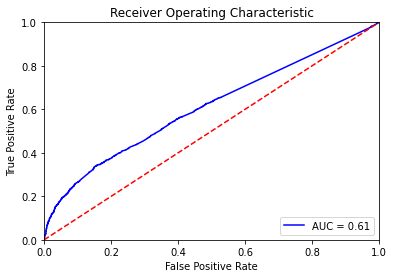

In [98]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = RF_clf.predict_proba(X_test)
preds = probs[:,1]
# preds = [1]*17119
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Other features - Provider Specialty Features

In [99]:
'''
prov_fb_ind	 Indicator of Facility Based provider using prov_line_cd	Others
prov_pcp_ind	 Indicator of Primary Care Physician provider using prov_line_cd	Others
prov_sp_ind	 Indicator of Specialist provider using prov_line_cd	Others
prov_spec_addiction_all_ind	 Binary indicator for a select group of categories using std_hipaa_prov_spec_cd	Others
prov_spec_ambulance_ind	 Binary indicator for a select group of categories using std_hipaa_prov_spec_cd	Others
prov_spec_bh_psychiatric_ind	 Binary indicator for a select group of categories using std_hipaa_prov_spec_cd	Others
prov_spec_chiropractic_ind	 Binary indicator for a select group of categories using std_hipaa_prov_spec_cd	Others
prov_spec_home_health_ind	 Binary indicator for a select group of categories using std_hipaa_prov_spec_cd	Others
prov_spec_med_supply_ind	 Binary indicator for a select group of categories using std_hipaa_prov_spec_cd	Others
prov_spec_nurse_phy_assist_ind	 Binary indicator for a select group of categories using std_hipaa_prov_spec_cd	Others
prov_spec_pain_mgmt_ind	 Binary indicator for a select group of categories using std_hipaa_prov_spec_cd	Others
prov_spec_phy_general_ind	 Binary indicator for a select group of categories using std_hipaa_prov_spec_cd	Others
prov_spec_phy_geriatric_ind	 Binary indicator for a select group of categories using std_hipaa_prov_spec_cd	Others
'''
#I guess these are the provider specific variables the patient is using for instance, if the patient had used ambulance, chiropractic etc.. 

'\nprov_fb_ind\t Indicator of Facility Based provider using prov_line_cd\tOthers\nprov_pcp_ind\t Indicator of Primary Care Physician provider using prov_line_cd\tOthers\nprov_sp_ind\t Indicator of Specialist provider using prov_line_cd\tOthers\nprov_spec_addiction_all_ind\t Binary indicator for a select group of categories using std_hipaa_prov_spec_cd\tOthers\nprov_spec_ambulance_ind\t Binary indicator for a select group of categories using std_hipaa_prov_spec_cd\tOthers\nprov_spec_bh_psychiatric_ind\t Binary indicator for a select group of categories using std_hipaa_prov_spec_cd\tOthers\nprov_spec_chiropractic_ind\t Binary indicator for a select group of categories using std_hipaa_prov_spec_cd\tOthers\nprov_spec_home_health_ind\t Binary indicator for a select group of categories using std_hipaa_prov_spec_cd\tOthers\nprov_spec_med_supply_ind\t Binary indicator for a select group of categories using std_hipaa_prov_spec_cd\tOthers\nprov_spec_nurse_phy_assist_ind\t Binary indicator for a 

In [100]:
Prov_df= df.filter(items=['person_id_syn',
'transportation_issues',
'prov_fb_ind',
'prov_pcp_ind',
'prov_sp_ind',
'prov_spec_addiction_all_ind',
'prov_spec_ambulance_ind',
'prov_spec_bh_psychiatric_ind',
'prov_spec_chiropractic_ind',
'prov_spec_home_health_ind',
'prov_spec_med_supply_ind',
'prov_spec_nurse_phy_assist_ind',
'prov_spec_pain_mgmt_ind',
'prov_spec_phy_general_ind',
'prov_spec_phy_geriatric_ind'
])

In [101]:
#a=df.groupby('transportation_issues')[['prov_fb_ind']]#,'prov_pcp_ind','prov_sp_ind']].apply(lambda x: x['prov_fb_ind']*x['prov_pcp_ind']*x['prov_sp_ind'])
#a
#'prov_spec_addiction_all_ind',
#'prov_spec_ambulance_ind',
#'prov_spec_bh_psychiatric_ind',
#'prov_spec_chiropractic_ind',
#'prov_spec_home_health_ind',
#'prov_spec_med_supply_ind',
#'prov_spec_nurse_phy_assist_ind',
#'prov_spec_pain_mgmt_ind',
#'prov_spec_phy_general_ind',
#'prov_spec_phy_geriatric_ind'
a=Prov_df.groupby("transportation_issues")['prov_fb_ind'].value_counts()#.unstack().fillna(0)#size().unstack(fill_value=0)
a
.agg({i:'value_counts' for i in df.columns[2:]})

SyntaxError: invalid syntax (<ipython-input-101-87093bd8dee3>, line 15)

In [102]:
Prov_df.isna().sum()

person_id_syn                     0
transportation_issues             0
prov_fb_ind                       0
prov_pcp_ind                      0
prov_sp_ind                       0
prov_spec_addiction_all_ind       0
prov_spec_ambulance_ind           0
prov_spec_bh_psychiatric_ind      0
prov_spec_chiropractic_ind        0
prov_spec_home_health_ind         0
prov_spec_med_supply_ind          0
prov_spec_nurse_phy_assist_ind    0
prov_spec_pain_mgmt_ind           0
prov_spec_phy_general_ind         0
prov_spec_phy_geriatric_ind       0
dtype: int64

In [103]:
#Prov_df.head(5)
# all cat variables

In [104]:
Prov_df['transportation_issues'] = Prov_df['transportation_issues'] .astype('category')
Prov_df['prov_fb_ind'] = Prov_df['prov_fb_ind'] .astype('category')
Prov_df['prov_pcp_ind'] = Prov_df['prov_pcp_ind'] .astype('category')
Prov_df['prov_sp_ind'] = Prov_df['prov_sp_ind'] .astype('category')
Prov_df['prov_spec_addiction_all_ind'] = Prov_df['prov_spec_addiction_all_ind'] .astype('category')
Prov_df['prov_spec_ambulance_ind'] = Prov_df['prov_spec_ambulance_ind'] .astype('category')
Prov_df['prov_spec_bh_psychiatric_ind'] = Prov_df['prov_spec_bh_psychiatric_ind'] .astype('category')
Prov_df['prov_spec_chiropractic_ind'] = Prov_df['prov_spec_chiropractic_ind'] .astype('category')
Prov_df['prov_spec_home_health_ind'] = Prov_df['prov_spec_home_health_ind'] .astype('category')
Prov_df['prov_spec_med_supply_ind'] = Prov_df['prov_spec_med_supply_ind'] .astype('category')
Prov_df['prov_spec_nurse_phy_assist_ind'] = Prov_df['prov_spec_nurse_phy_assist_ind'] .astype('category')
Prov_df['prov_spec_pain_mgmt_ind'] = Prov_df['prov_spec_pain_mgmt_ind'] .astype('category')
Prov_df['prov_spec_phy_general_ind'] = Prov_df['prov_spec_phy_general_ind'] .astype('category')
Prov_df['prov_spec_phy_geriatric_ind'] = Prov_df['prov_spec_phy_geriatric_ind'] .astype('category')

In [105]:
# for i in Prov_df.columns:
#     if i=='person_id_syn':
#             continue
#     if i=='transportation_issues':
#         continue
#     df_one = Prov_df[Prov_df[i] !=0]
#     print("percentage of patients issues in ",i,df_one.shape[0]/Prov_df.shape[0])
#     print("percentage of patients having No Transportation in Issue",i, df_one[df_one.transportation_issues == 0].shape[0]/df_one.shape[0])

In [106]:
for i in Prov_df.columns:
    if i=='person_id_syn':
            continue
    if i=='transportation_issues':
        continue
    df_one = Prov_df[Prov_df[i] !=0]
    print("percentage of patients issues in ",i,df_one.shape[0]/Prov_df.shape[0])
    print("percentage of patients having Transportation in Issue",i, df_one[df_one.transportation_issues == 1].shape[0]/df_one.shape[0])
    #print(i,(df_one[df_one.transportation_issues == 1].shape[0]/df_one.shape[0])/(df_one[df_one.transportation_issues == 0].shape[0]/df_one.shape[0]))

percentage of patients issues in  prov_fb_ind 0.8038866210544472
percentage of patients having Transportation in Issue prov_fb_ind 0.14969246173651837
percentage of patients issues in  prov_pcp_ind 0.9423331225205542
percentage of patients having Transportation in Issue prov_pcp_ind 0.14466137888956682
percentage of patients issues in  prov_sp_ind 0.9427930776749267
percentage of patients having Transportation in Issue prov_sp_ind 0.14585620197585072
percentage of patients issues in  prov_spec_addiction_all_ind 0.17731271201057897
percentage of patients having Transportation in Issue prov_spec_addiction_all_ind 0.16245136186770429
percentage of patients issues in  prov_spec_ambulance_ind 0.12743632495831655
percentage of patients having Transportation in Issue prov_spec_ambulance_ind 0.29889465373336344
percentage of patients issues in  prov_spec_bh_psychiatric_ind 0.1286293336399701
percentage of patients having Transportation in Issue prov_spec_bh_psychiatric_ind 0.2281819197675718
p

In [111]:
Prov_df.columns.value_counts()

prov_spec_chiropractic_ind        1
prov_spec_bh_psychiatric_ind      1
prov_spec_ambulance_ind           1
prov_fb_ind                       1
prov_pcp_ind                      1
transportation_issues             1
prov_spec_pain_mgmt_ind           1
person_id_syn                     1
prov_spec_home_health_ind         1
prov_spec_phy_general_ind         1
prov_spec_phy_geriatric_ind       1
prov_spec_addiction_all_ind       1
prov_spec_nurse_phy_assist_ind    1
prov_sp_ind                       1
prov_spec_med_supply_ind          1
dtype: int64

In [112]:
##added above 10
Prov_df.drop(['transportation_issues','prov_spec_chiropractic_ind','prov_fb_ind','prov_pcp_ind','prov_sp_ind','prov_spec_addiction_all_ind','prov_spec_bh_psychiatric_ind','prov_spec_chiropractic_ind','prov_spec_med_supply_ind','prov_spec_nurse_phy_assist_ind','prov_spec_phy_general_ind'],axis=1).to_pickle('df_prov_suraj.pkl')

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [125]:
df_no_issue = Prov_df[Prov_df.transportation_issues == 0]
print(df_no_issue.shape)
df_issue = Prov_df[Prov_df.transportation_issues == 1]
print(df_issue.shape)

(59375, 15)
(10197, 15)


In [126]:
Prov_df_no_issue_sample = df_no_issue.sample(n=10197)
Prov_new_df = pd.concat([Prov_df_no_issue_sample, df_issue])
Prov_new_df.shape

(20394, 15)

In [127]:
Prov_new_df.isna().sum()

person_id_syn                     0
transportation_issues             0
prov_fb_ind                       0
prov_pcp_ind                      0
prov_sp_ind                       0
prov_spec_addiction_all_ind       0
prov_spec_ambulance_ind           0
prov_spec_bh_psychiatric_ind      0
prov_spec_chiropractic_ind        0
prov_spec_home_health_ind         0
prov_spec_med_supply_ind          0
prov_spec_nurse_phy_assist_ind    0
prov_spec_pain_mgmt_ind           0
prov_spec_phy_general_ind         0
prov_spec_phy_geriatric_ind       0
dtype: int64

In [128]:
y = Prov_new_df['transportation_issues']
X = Prov_new_df.drop(columns=['transportation_issues','person_id_syn','prov_spec_chiropractic_ind','prov_fb_ind','prov_pcp_ind','prov_sp_ind','prov_spec_addiction_all_ind','prov_spec_bh_psychiatric_ind','prov_spec_chiropractic_ind','prov_spec_med_supply_ind','prov_spec_nurse_phy_assist_ind','prov_spec_phy_general_ind'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [129]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred_test=logistic_regression.predict(X_test)
y_pred_train=logistic_regression.predict(X_train)

In [130]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
print('Accuracy: ',metrics.accuracy_score(y_train, y_pred_train))

Accuracy:  0.5926652284761718
Accuracy:  0.5892775416802877


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
RF_clf = RandomForestClassifier(n_estimators=300,max_depth=10)
RF_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300)

In [132]:
y_rf_pred_test = RF_clf.predict(X_test)
y_rf_pred_train = RF_clf.predict(X_train)

print(classification_report(y_test, y_rf_pred_test))
print(classification_report(y_train, y_rf_pred_train))

print(metrics.accuracy_score(y_test, y_rf_pred_test))
print(metrics.accuracy_score(y_train, y_rf_pred_train))

              precision    recall  f1-score   support

           0       0.56      0.82      0.67      2550
           1       0.67      0.36      0.47      2549

    accuracy                           0.59      5099
   macro avg       0.62      0.59      0.57      5099
weighted avg       0.62      0.59      0.57      5099

              precision    recall  f1-score   support

           0       0.56      0.81      0.66      7647
           1       0.66      0.37      0.48      7648

    accuracy                           0.59     15295
   macro avg       0.61      0.59      0.57     15295
weighted avg       0.61      0.59      0.57     15295

0.5918807609335164
0.5897352075841779


In [ ]:
#trash

In [ ]:
df_one[df_one.transportation_issues == 1].shape[0]
df_one[df_one.transportation_issues == 0].shape[0]
df_one[df_one.transportation_issues == 1].shape[0]/df_one[df_one.transportation_issues == 0].shape[0])

In [203]:
for i in Prov_df.columns:
    if i=='transportation_issues':
        continue
    try:
        #False
        df_trans = Prov_df[Prov_df['transportation_issues'] ==0]
        #False Positive
        df_trans_con = df_trans[df_trans[i] ==1]
        #False negative
        df_trans_con_no = df_trans[df_trans[i] ==0]

        #True 
        df_non_trans = Prov_df[Prov_df['transportation_issues'] ==1]
        #True Positive=
        df_non_trans_con = df_non_trans[df_non_trans[i] ==1]
        #True negative
        df_non_trans_con_no = df_non_trans[df_non_trans[i] ==0]
        FP=df_trans_con.shape[0]
        FN=df_trans_con_no.shape[0]
        TP=df_non_trans_con.shape[0]
        TN=df_non_trans_con_no.shape[0]
        P=TP/TP+FP
        R=TP/TP+FN
        F=2*(P*R)/(P+R)
        print(i ,F/1000)
    except:
        continue

prov_fb_ind 18.934056621250654
prov_pcp_ind 6.233191303029793
prov_sp_ind 6.32376596998838
prov_spec_addiction_all_ind 17.069628037792413
prov_spec_ambulance_ind 11.132112434107484
prov_spec_bh_psychiatric_ind 12.208627987267796
prov_spec_chiropractic_ind 3.7158307088603335
prov_spec_home_health_ind 6.55031887767991
prov_spec_med_supply_ind 15.399606581673039
prov_spec_nurse_phy_assist_ind 29.353961298145748
prov_spec_pain_mgmt_ind 7.155453188945215
prov_spec_phy_general_ind 23.625463058086464
prov_spec_phy_geriatric_ind 0.5117752665173384


In [204]:
for i in Prov_df.columns:
    if i=='transportation_issues':
        continue
    try:
        #False
        df_trans = Prov_df[Prov_df['transportation_issues'] ==0]
        #False Positive
        df_trans_con = df_trans[df_trans[i] ==1]
        #True Positive
        df_trans_con_no = df_trans[df_trans[i] ==0]

        #True 
        df_non_trans = Prov_df[Prov_df['transportation_issues'] ==1]
        #True negative=
        df_non_trans_con = df_non_trans[df_non_trans[i] ==1]
        #false negative
        df_non_trans_con_no = df_non_trans[df_non_trans[i] ==0]
        FP=df_trans_con.shape[0]
        TP=df_trans_con_no.shape[0]
        TN=df_non_trans_con.shape[0]
        FN=df_non_trans_con_no.shape[0]
        P=TP/TP+FP
        R=TP/TP+FN
        F=2*(P*R)/(P+R)
        print(i ,F/1000)
    except:
        continue

prov_fb_ind 3.5169625984650588
prov_pcp_ind 1.41004659188956
prov_sp_ind 1.2479448611822017
prov_spec_addiction_all_ind 9.140022885518432
prov_spec_ambulance_ind 6.818149800217944
prov_spec_bh_psychiatric_ind 7.480303770578864
prov_spec_chiropractic_ind 3.2216839986581687
prov_spec_home_health_ind 5.020674509803922
prov_spec_med_supply_ind 8.516207005438279
prov_spec_nurse_phy_assist_ind 9.107441406006119
prov_spec_pain_mgmt_ind 5.378584930550167
prov_spec_phy_general_ind 5.118871601274385
prov_spec_phy_geriatric_ind 0.5012994904336122


In [206]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [210]:
#CMS_df['cms_ra_factor_type_cd'].replace('*','',inplace=True)
df_no_issue = Prov_df[Prov_df.transportation_issues == 0]
print(df_no_issue.shape)
#df_no_issue = df_no_issue.dropna()
#print("after dropping NA values",df_no_issue.shape)
df_issue = Prov_df[Prov_df.transportation_issues == 1]
print(df_issue.shape)
#df_issue = df_issue.dropna()
#print("after dropping NA values",df_issue.shape)
# df_issue.isna().sum()

# Prov_df_no_issue_sample = df_no_issue.sample(n=10197)
# Prov_new_df = pd.concat([Prov_df_no_issue_sample, df_issue])
# Prov_new_df.shape 
Prov_new_df=Prov_df
Prov_new_df.shape

(59375, 15)
(10197, 15)


(69572, 15)

Accuracy:  0.8498821364916921
Accuracy:  0.8546158416221085
test               precision    recall  f1-score   support

           0       0.85      1.00      0.92     14782
           1       0.00      0.00      0.00      2611

    accuracy                           0.85     17393
   macro avg       0.42      0.50      0.46     17393
weighted avg       0.72      0.85      0.78     17393

train               precision    recall  f1-score   support

           0       0.85      1.00      0.92     44593
           1       0.00      0.00      0.00      7586

    accuracy                           0.85     52179
   macro avg       0.43      0.50      0.46     52179
weighted avg       0.73      0.85      0.79     52179




/root/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/Humana-Challenge/cf_matrix.py:81: RuntimeWarning: invalid value encountered in long_scalars
  precision = cf[1,1] / sum(cf[:,1])


<Figure size 1440x1080 with 0 Axes>

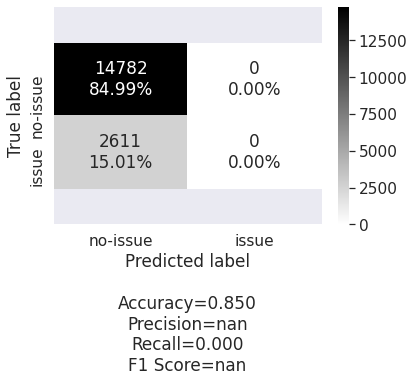

In [211]:
# prov_fb_ind 18.934056621250654
# prov_pcp_ind 6.233191303029793
# prov_sp_ind 6.32376596998838
# prov_spec_addiction_all_ind 17.069628037792413
# prov_spec_ambulance_ind 11.132112434107484
# prov_spec_bh_psychiatric_ind 12.208627987267796
# prov_spec_chiropractic_ind 3.7158307088603335
# prov_spec_home_health_ind 6.55031887767991
# prov_spec_med_supply_ind 15.399606581673039
# prov_spec_nurse_phy_assist_ind 29.353961298145748
# prov_spec_pain_mgmt_ind 7.155453188945215
# prov_spec_phy_general_ind 23.625463058086464
# prov_spec_phy_geriatric_ind 0.5117752665173384




y = Prov_new_df['transportation_issues']
X = Prov_new_df[['prov_spec_phy_general_ind','prov_spec_nurse_phy_assist_ind','prov_spec_med_supply_ind','prov_spec_addiction_all_ind','prov_fb_ind']]
#X = Prov_new_df.drop(columns=['transportation_issues','person_id_syn'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred_test=logistic_regression.predict(X_test)
y_pred_train=logistic_regression.predict(X_train)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
print('Accuracy: ',metrics.accuracy_score(y_train, y_pred_train))
print('test',classification_report(y_test, y_pred_test))
print('train',classification_report(y_train, y_pred_train))
print()
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
# cf_matrix = confusion_matrix(y_test, y_pred_test)
# print(cf_matrix)


#from cf.matrix import cf_ 
import cf_matrix
from cf_matrix import make_confusion_matrix
#print('test',classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4) # for label size
make_confusion_matrix(cm, group_names=['no- issue','issue'],categories=['no-issue','issue'], cmap='binary')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) 
plt.show()
#print("Accuracy of model on Test dataset",accuracy_score(y_test, predict_y_test))

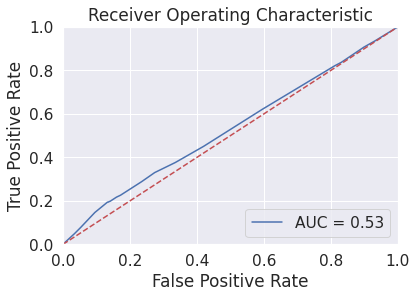

In [209]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logistic_regression.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [162]:
!pip install cf_matrix

ERROR: Could not find a version that satisfies the requirement cf_matrix (from versions: none)
ERROR: No matching distribution found for cf_matrix


In [143]:
y = Prov_new_df['transportation_issues']
X = Prov_new_df[['prov_spec_phy_geriatric_ind','prov_sp_ind','prov_pcp_ind','prov_fb_ind','prov_spec_chiropractic_ind']]
#X = Prov_new_df.drop(columns=['transportation_issues','person_id_syn'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred_test=logistic_regression.predict(X_test)
y_pred_train=logistic_regression.predict(X_train)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
print('Accuracy: ',metrics.accuracy_score(y_train, y_pred_train))
print('test',classification_report(y_test, y_pred_test))
print('train',classification_report(y_train, y_pred_train))
print()

Accuracy:  0.5128456560109825
Accuracy:  0.5189277541680287
test               precision    recall  f1-score   support

           0       0.54      0.19      0.28      2550
           1       0.51      0.83      0.63      2549

    accuracy                           0.51      5099
   macro avg       0.52      0.51      0.46      5099
weighted avg       0.52      0.51      0.46      5099

train               precision    recall  f1-score   support

           0       0.55      0.19      0.29      7647
           1       0.51      0.85      0.64      7648

    accuracy                           0.52     15295
   macro avg       0.53      0.52      0.46     15295
weighted avg       0.53      0.52      0.46     15295




In [94]:
for i in Prov_df.columns:
    if i=='person_id_syn':
            continue
    if i=='Transportation Issue':
        continue
    df_one = Prov_df[Prov_df[i] !=0]
    #print("percentage of patients issues in ",i,df_one.shape[0]/util_df.shape[0])
    #print("percentage of patients having No Transportation in Issue",i, df_one[df_one.transportation_issues == 0].shape[0]/df_one.shape[0])
    #print("percentage of patients having Transportation in Issue",i, df_one[df_one.transportation_issues ==1].shape[0]/df_one.shape[0])
#     if (df_one[df_one.transportation_issues == 0].shape[0]/df_one.shape[0] < df_one[df_one.transportation_issues ==1].shape[0]/df_one.shape[0]):
#         print(i)
#    try:
#        if (df_one.shape[0]/df_one[df_one.transportation_issues == 0].shape[0] < df_one.shape[0]/df_one[df_one.transportation_issues == 1].shape[0]):
#            print(i)
#    except:
#        continue
    print("percentage of patients issues in ",i,df_one.shape[0]/util_df.shape[0])
    print("percentage of patients having No Transportation in Issue",i, df_one[df_one.transportation_issues == 0].shape[0]/df_one.shape[0])
    print("percentage of patients having Transportation in Issue",i, df_one[df_one.transportation_issues ==1].shape[0]/df_one.shape[0])       
    
    df_two = Prov_df[Prov_df[i] !=1]
    print("percentage of patients issues in ",i,df_two.shape[0]/util_df.shape[0])
    print("percentage of patients having No Transportation in Issue",i, df_two[df_two.transportation_issues == 0].shape[0]/df_two.shape[0])
    print("percentage of patients having Transportation in Issue",i, df_two[df_two.transportation_issues ==1].shape[0]/df_two.shape[0])

percentage of patients issues in  transportation_issues 0.1465675846604956
percentage of patients having No Transportation in Issue transportation_issues 0.0
percentage of patients having Transportation in Issue transportation_issues 1.0
percentage of patients issues in  transportation_issues 0.8534324153395044
percentage of patients having No Transportation in Issue transportation_issues 1.0
percentage of patients having Transportation in Issue transportation_issues 0.0
percentage of patients issues in  prov_fb_ind 0.8038866210544472
percentage of patients having No Transportation in Issue prov_fb_ind 0.8503075382634816
percentage of patients having Transportation in Issue prov_fb_ind 0.14969246173651837
percentage of patients issues in  prov_fb_ind 0.1961133789455528
percentage of patients having No Transportation in Issue prov_fb_ind 0.8662415713866901
percentage of patients having Transportation in Issue prov_fb_ind 0.1337584286133099
percentage of patients issues in  prov_pcp_ind 

In [83]:
Prov_df['transportation_issues'] = Prov_df['transportation_issues'] .astype('category')
Prov_df['prov_fb_ind'] = Prov_df['prov_fb_ind'] .astype('category')
Prov_df['prov_pcp_ind'] = Prov_df['prov_pcp_ind'] .astype('category')
Prov_df['prov_sp_ind'] = Prov_df['prov_sp_ind'] .astype('category')
Prov_df['prov_spec_addiction_all_ind'] = Prov_df['prov_spec_addiction_all_ind'] .astype('category')
Prov_df['prov_spec_ambulance_ind'] = Prov_df['prov_spec_ambulance_ind'] .astype('category')
Prov_df['prov_spec_bh_psychiatric_ind'] = Prov_df['prov_spec_bh_psychiatric_ind'] .astype('category')
Prov_df['prov_spec_chiropractic_ind'] = Prov_df['prov_spec_chiropractic_ind'] .astype('category')
Prov_df['prov_spec_home_health_ind'] = Prov_df['prov_spec_home_health_ind'] .astype('category')
Prov_df['prov_spec_med_supply_ind'] = Prov_df['prov_spec_med_supply_ind'] .astype('category')
Prov_df['prov_spec_nurse_phy_assist_ind'] = Prov_df['prov_spec_nurse_phy_assist_ind'] .astype('category')
Prov_df['prov_spec_pain_mgmt_ind'] = Prov_df['prov_spec_pain_mgmt_ind'] .astype('category')
Prov_df['prov_spec_phy_general_ind'] = Prov_df['prov_spec_phy_general_ind'] .astype('category')
Prov_df['prov_spec_phy_geriatric_ind'] = Prov_df['prov_spec_phy_geriatric_ind'] .astype('category')

In [84]:
Prov_df.head(1)

,person_id_syn,transportation_issues,prov_fb_ind,prov_pcp_ind,prov_sp_ind,prov_spec_addiction_all_ind,prov_spec_ambulance_ind,prov_spec_bh_psychiatric_ind,prov_spec_chiropractic_ind,prov_spec_home_health_ind,prov_spec_med_supply_ind,prov_spec_nurse_phy_assist_ind,prov_spec_pain_mgmt_ind,prov_spec_phy_general_ind,prov_spec_phy_geriatric_ind
0,0002MOb79ST17bLYAe46eIc2,0,1,1,1,0,0,0,0,0,0,1,0,1,0


In [ ]:
util_df.drop('transportation_issues',axis=1).to_pickle('df_total_suraj.pkl')

In [ ]:
#CMS_df['cms_ra_factor_type_cd'].replace('*','',inplace=True)
df_no_issue = util_df[util_df.transportation_issues == 0]
print(df_no_issue.shape)
#df_no_issue = df_no_issue.dropna()
#print("after dropping NA values",df_no_issue.shape)
df_issue = util_df[util_df.transportation_issues == 1]
print(df_issue.shape)
#df_issue = df_issue.dropna()
#print("after dropping NA values",df_issue.shape)
# df_issue.isna().sum()

In [ ]:
## Medical Claims Features
## Utilization - Utilization by Category (IP admits/ER visits/Outpatient/Ambulance etc.)

In [57]:
med_df= df.filter(items=['person_id_syn',
'transportation_issues',
'med_ambulance_visit_ct_pmpm',
'med_er_visit_ct_pmpm',
'med_ip_acute_admit_ct_pmpm',
'med_ip_acute_admit_days_pmpm',
'med_ip_ltach_admit_ct_pmpm',
'med_ip_ltach_admit_days_pmpm',
'med_ip_maternity_admit_ct_pmpm',
'med_ip_maternity_admit_days_pmpm',
'med_ip_mhsa_admit_ct_pmpm',
'med_ip_mhsa_admit_days_pmpm',
'med_ip_rehab_admit_ct_pmpm',
'med_ip_rehab_admit_days_pmpm',
'med_ip_snf_admit_ct_pmpm',
'med_ip_snf_admit_days_pmpm',
'med_outpatient_visit_ct_pmpm',
'med_physician_office_visit_ct_pmpm',
'med_urgent_care_visit_ct_pmpm',
])

total_ambulance_visit_ct_pmpm
total_er_visit_ct_pmpm
total_ip_acute_admit_ct_pmpm
total_ip_acute_admit_days_pmpm
total_ip_ltach_admit_ct_pmpm
total_ip_ltach_admit_days_pmpm
total_ip_maternity_admit_ct_pmpm
total_ip_maternity_admit_days_pmpm
total_ip_mhsa_admit_ct_pmpm
total_ip_mhsa_admit_days_pmpm
total_ip_rehab_admit_ct_pmpm
total_ip_rehab_admit_days_pmpm
total_ip_snf_admit_ct_pmpm
total_ip_snf_admit_days_pmpm
total_outpatient_visit_ct_pmpm
total_physician_office_visit_ct_pmpm
total_urgent_care_visit_ct_pmpm

In [58]:
med_df.isna().sum()

person_id_syn                         0
transportation_issues                 0
med_ambulance_visit_ct_pmpm           0
med_er_visit_ct_pmpm                  0
med_ip_acute_admit_ct_pmpm            0
med_ip_acute_admit_days_pmpm          0
med_ip_ltach_admit_ct_pmpm            0
med_ip_ltach_admit_days_pmpm          0
med_ip_maternity_admit_ct_pmpm        0
med_ip_maternity_admit_days_pmpm      0
med_ip_mhsa_admit_ct_pmpm             0
med_ip_mhsa_admit_days_pmpm           0
med_ip_rehab_admit_ct_pmpm            0
med_ip_rehab_admit_days_pmpm          0
med_ip_snf_admit_ct_pmpm              0
med_ip_snf_admit_days_pmpm            0
med_outpatient_visit_ct_pmpm          0
med_physician_office_visit_ct_pmpm    0
med_urgent_care_visit_ct_pmpm         0
dtype: int64

In [59]:
#CMS_df['cms_ra_factor_type_cd'].replace('*','',inplace=True)
df_no_issue = med_df[med_df.transportation_issues == 0]
print(df_no_issue.shape)
#df_no_issue = df_no_issue.dropna()
#print("after dropping NA values",df_no_issue.shape)
df_issue = med_df[med_df.transportation_issues == 1]
print(df_issue.shape)
#df_issue = df_issue.dropna()
#print("after dropping NA values",df_issue.shape)
# df_issue.isna().sum()

(59375, 19)
(10197, 19)


In [60]:
med_df_no_issue_sample = df_no_issue.sample(n=10197)
med_new_df = pd.concat([med_df_no_issue_sample, df_issue])
med_new_df.shape

(20394, 19)